In [2]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [3]:
import keras
keras.__version__

'3.3.3'

In [4]:
import sklearn
sklearn.__version__

'1.4.2'

In [5]:
import seaborn
seaborn.__version__

'0.13.2'

In [6]:
import lightgbm
lightgbm.__version__

'4.3.0'

In [7]:
import optuna
optuna.__version__

'3.6.1'

In [8]:
import pandas
pandas.__version__

'2.2.2'

In [9]:
import numpy as np
np.__version__

'1.26.4'

In [10]:
import matplotlib
matplotlib.__version__

'3.8.4'

In [11]:
import imblearn
imblearn.__version__

'0.12.2'

In [12]:
import catboost
catboost.__version__

'1.2.5'

In [13]:
import xgboost
xgboost.__version__

'2.0.3'

In [14]:
import bokeh
bokeh.__version__

'3.4.1'

In [15]:
import cv2
cv2.__version__

'4.9.0'

이공학적 설계를 위한 인공지능 최적화
(Artificial Intelligence and Optimization Techniques for Engineering Design)

Chapter 2

In [ ]:
with open("C:/Users/In-Ho Lee/testAI/Breast_cancer_data.csv", "r") as f:
    line = f.readline()
    while line:
        print(line)
        line = f.readline()

with open("C:/Users/In-Ho Lee/testAI/Breast_cancer_data.csv", "r") as f:
    for line in f:
        parts = line.split()
        print(parts)

s = "apple,banana,grape"
fruits = s.split(",")
print(fruits) # ['apple', 'banana', 'grape']

s = "The quick brown fox"
words = s.split()
print(words) # ['The', 'quick', 'brown', 'fox']

!pip install numpy

In [ ]:
import numpy as np
aa = []
bb = []
colors = []
afile = open("C:/Users/In-Ho Lee/testAI/fort.11", "r")
ii = 0
for line in afile:
    if len(line.split()) == 4:
        continue
    if len(line.split()) == 2:
        ii = ii+1
        bb.append(float(line.split()[1]))
        aa.append(int(line.split()[0]))
        colors.append(float(line.split()[0])/230.)
afile.close()
aa = np.array(aa)
bb = np.array(bb)
colors = np.array(colors)

!pip install scikit-learn

In [ ]:
#딕셔너리를 만드는 법: 두 개의 리스트로 부터 딕셔너리를 만드는 방법.
fruits = ["Apple", "Pear", "Peach", "Banana"]
prices = [0.35, 0.40, 0.40, 0.28]
adict = dict(zip(fruits, prices))
print(adict)

#리스트를 만드는 방법: range 함수를 이용하는 방법.
alist=[ j for j in range(10)  ]
alist

In [ ]:
def append_new_line(file_name, text_to_append):
    with open(file_name, "a+") as file_object:
        file_object.seek(0)
        data = file_object.read(100)
        if len(data) > 0:
            file_object.write("\n")
        file_object.write(text_to_append)


def append_multiple_lines(file_name, lines_to_append):
    with open(file_name, "a+") as file_object:
        appendEOL = False
        file_object.seek(0)
        data = file_object.read(100)
        if len(data) > 0:
            appendEOL = True
        for line in lines_to_append:
            if appendEOL == True:
                file_object.write("\n")
            else:
                appendEOL = True
            file_object.write(line)

In [ ]:
list_of_lines = ['First line', 'Second line', 'Third line']
append_multiple_lines('target00.txt', list_of_lines)

trialobj=0.
lines_to_append = []
lines_to_append.append(str(trialobj))
append_multiple_lines('target00.txt', list_of_lines)

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
print(X)

v.inverse_transform(X) == [{'bar': 2.0, 'foo': 1.0},
                           {'baz': 1.0, 'foo': 3.0}]

print(v.transform({'foo': 4, 'unseen_feature': 3}))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()


print(X.toarray())


vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()


print(X.shape)

In [ ]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10)
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
f = h.transform(D)
f.toarray()

In [ ]:
h = FeatureHasher(n_features=8, input_type="string")
raw_X = [["dog", "cat", "snake"], ["snake", "dog"], ["cat", "bird"]]
f = h.transform(raw_X)
f.toarray()

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = HashingVectorizer(n_features=2**4)
X = vectorizer.fit_transform(corpus)
print(X.shape)

!pip install lightgbm

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier

X, y = make_classification(n_samples=10000, n_features=100,
                           n_informative=50, n_redundant=50, random_state=1)

model = LGBMClassifier(max_bin=255, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

이공학적 설계를 위한 인공지능 최적화
(Artificial Intelligence and Optimization Techniques for Engineering Design)

Chapter 4

In [ ]:
from sklearn.preprocessing import StandardScaler
data = [[1, 1], [2, 3], [3, 2], [1, 1]]
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)
print(scaled)
# for inverse transformation
inversed = scaler.inverse_transform(scaled)
print(inversed)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = ["paris", "paris", "tokyo", "amsterdam"]
le_fitted = le.fit_transform(df)
print(le_fitted)
inverted = le.inverse_transform(le_fitted)
print(inverted)
# array(['paris', 'paris', 'tokyo', 'amsterdam'], dtype='|S9')

In [ ]:
from scipy.stats import entropy
import numpy as np


def kl_divergence(p, q):
    """
    Kullback-Leibler divergence 계산 함수
    """
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))


def jensen_shannon_divergence(p, q):
    """
    Jensen-Shannon divergence 계산 함수
    """
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)


# 예시
p = np.array([0.1, 0.4, 0.5])
q = np.array([0.4, 0.3, 0.3])
kl_div = kl_divergence(p, q)
print("Kullback-Leibler divergence: ", kl_div)

kl_div = entropy(p, q)
print("Kullback-Leibler divergence: ", kl_div)

kl_div = kl_divergence(q, p)
print("Kullback-Leibler divergence: ", kl_div)

kl_div = entropy(q, p)
print("Kullback-Leibler divergence: ", kl_div)

jsd = jensen_shannon_divergence(p, q)
print("Jensen-Shannon divergence: ", jsd)
jsd = jensen_shannon_divergence(q, p)
print("Jensen-Shannon divergence: ", jsd)

!pip install imbalanced-learn

!pip install matplotlib

In [ ]:
# oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(dataset.data, dataset.target)
print(model)
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first three features.
y = iris.target

# make it binary classification problem
X = X[np.logical_or(y == 0, y == 1)]
y = y[np.logical_or(y == 0, y == 1)]

model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel="rbf", gamma=0.5, C=2)
clf = model.fit(X, y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)


def zz(x, y):
    return (-clf.intercept_[0]-clf.coef_[0]
            [0]*x - clf.coef_[0][1]*y) / clf.coef_[0][2]


tmp = np.linspace(-4, 4, 30)
xx, yy = np.meshgrid(tmp, tmp)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2],
          'ob', markersize=3, alpha=0.5)
ax.plot3D(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2],
          'sr', markersize=3, alpha=0.5)
ax.plot_surface(xx, yy, zz(xx, yy))
ax.view_init(19, 66)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
np.random.seed(17)
npoints=100
X = np.r_[np.random.randn(npoints, 2)-[2, 2], np.random.randn(npoints, 2)+[2, 2]]
y = [0] * npoints + [1] * npoints
# fit the model, 훈련
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)
# get the separating hyperplane, 초평면
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx-(clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy-np.sqrt(1 + a ** 2) * margin
yy_up = yy+np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(4, 4))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors="none", zorder=10, edgecolors="cyan")
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
            edgecolors="k")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

!pip install pandas

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
iris = load_iris()
feature_names = ['sl', 'sw', 'pl', 'pw']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
gmm = GaussianMixture(n_components=3, random_state=17).fit(iris.data)
gmm_labels = gmm.predict(iris.data)
irisDF['gmm_cluster'] = gmm_labels
print(irisDF.groupby('target')['gmm_cluster'].value_counts())
Xynew = gmm.sample(10)
Xynew
n_c=np.arange(1,21)
models=[GaussianMixture(n,random_state=17).fit(iris.data) for n in n_c]
plt.plot(n_c,[m.bic(iris.data) for m in models], label='BIC')
plt.plot(n_c,[m.aic(iris.data) for m in models], label='AIC')
plt.legend()
plt.xlabel('n_components')

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
cancer = load_breast_cancer()
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target)

params = {'n_estimators': [100], 'max_depth': [6, 8, 10, 12], 'min_samples_leaf': [8, 12, 18],
          'min_samples_split': [8, 16, 20]}

clf = RandomForestClassifier(n_estimators=100)
grid_clf = GridSearchCV(clf, param_grid=params, cv=2,
                        n_jobs=-1)  # -1 은 cpu를 다 쓴다는 의미
grid_clf.fit(X_train, y_train)

print(f"optimal parameters\n{grid_clf.best_params_}")
print(f"best score: {grid_clf.best_score_}")

!pip install optuna

In [1]:
import pandas as pd
import numpy as np
import optuna

import lightgbm as lgb
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    if False:
        X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
    df = pd.read_csv('C:/Users/In-Ho Lee/testAI/Breast_cancer_data.csv')
    X = df[['mean_radius', 'mean_texture',
            'mean_perimeter', 'mean_area', 'mean_smoothness']]
    y = df['diagnosis']
    train_x, valid_x, train_y, valid_y = train_test_split(
        X, y, test_size=0.3)
    dtrain = lgb.Dataset(train_x, label=train_y)

    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))
    print("Best trial:")
    trial = study.best_trial
    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2024-05-08 10:14:43,915] A new study created in memory with name: no-name-09778c28-4034-461b-be52-ae8891abff7b
[I 2024-05-08 10:14:43,963] Trial 0 finished with value: 0.9181286549707602 and parameters: {'lambda_l1': 0.007620287739533468, 'lambda_l2': 3.549009191893202e-06, 'num_leaves': 164, 'feature_fraction': 0.6880535906729299, 'bagging_fraction': 0.7495605612498539, 'bagging_freq': 1, 'min_child_samples': 32}. Best is trial 0 with value: 0.9181286549707602.
[I 2024-05-08 10:14:44,000] Trial 1 finished with value: 0.9415204678362573 and parameters: {'lambda_l1': 1.6584964765516033e-08, 'lambda_l2': 3.9865042966226363, 'num_leaves': 219, 'feature_fraction': 0.6639463248870692, 'bagging_fraction': 0.9505319866651383, 'bagging_freq': 7, 'min_child_samples': 91}. Best is trial 1 with value: 0.9415204678362573.
[I 2024-05-08 10:14:44,035] Trial 2 finished with value: 0.935672514619883 and parameters: {'lambda_l1': 0.004448444169777525, 'lambda_l2': 0.0032445258115428063, 'num_leaves'

Number of finished trials: 100
Best trial:
  Value: 0.9766081871345029
  Params: 
    lambda_l1: 6.356553434903128e-07
    lambda_l2: 0.2751045005618297
    num_leaves: 42
    feature_fraction: 0.6070394541553003
    bagging_fraction: 0.9995160079482455
    bagging_freq: 2
    min_child_samples: 19


!pip install catboost

!pip install xgboost

!pip install seaborn

In [ ]:
from warnings import filterwarnings
import warnings
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import random

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)


filterwarnings("ignore")

from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from numpy import argmax

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

if False:
    iris = load_iris()
    X, y = iris.data, iris.target

if True:
    df = pd.read_csv('C:/Users/In-Ho Lee/testAI/Breast_cancer_data.csv')
    df.head()
    X = df[['mean_radius', 'mean_texture',
            'mean_perimeter', 'mean_area', 'mean_smoothness']]
    y = df['diagnosis']

from scipy.sparse import coo_matrix
X_sparse = coo_matrix(X)

X, X_sparse, y = shuffle(X, X_sparse, y, random_state=0)

def create_base_model(X, y, test_size=0.20, cv=5, plot=False, save_results=False):
    names = []
    acc_results = []
    acc_train_results = []
    acc_test_results = []
    r2_results = []
    r2_train_results = []
    r2_test_results = []
    cv_results_acc = []
    cv_results_f1 = []
    cv_results_roc_auc = []

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=17)
    rs = 1234
    models = [('LogR', LogisticRegression(random_state=rs)),
              ("NB", GaussianNB()),
              ("KNN", KNeighborsClassifier()),
              ("SVC", SVC(random_state=rs)),
              ('ANN', MLPClassifier(random_state=rs)),
              ('CART', DecisionTreeClassifier(random_state=rs)),
              ('RF', RandomForestClassifier(random_state=rs)),
              ("AdaBoost", AdaBoostClassifier(random_state=rs)),
              ('BGTrees', BaggingClassifier(bootstrap_features=True, random_state=rs)),
              ('GBM', GradientBoostingClassifier(random_state=rs)),
              ("XGBoost", XGBClassifier(objective='reg:squarederror', random_state=rs)),
              ("LightGBM", LGBMClassifier(random_state=rs)),
              ("CatBoost", CatBoostClassifier(verbose=False, random_state=rs))]

    for name, classifier in models:
        model_fit = classifier.fit(X_train, y_train)
        # Acc Score
        acc = accuracy_score(y, model_fit.predict(X))
        acc_train = accuracy_score(y_train, model_fit.predict(X_train))
        acc_test = accuracy_score(y_test, model_fit.predict(X_test))
        acc_results.append(acc)
        acc_train_results.append(acc_train)
        acc_test_results.append(acc_test)

        # R2 Score
        r2 = model_fit.score(X, y)
        r2_train = model_fit.score(X_train, y_train)
        r2_test = model_fit.score(X_test, y_test)
        r2_results.append(r2)
        r2_train_results.append(r2_train)
        r2_test_results.append(r2_test)

        # Cross Validate Score
        cv_result = cross_validate(model_fit, X, y, cv=cv, scoring=[
                                   "accuracy", "f1", "roc_auc"])
        cv_result_acc = cv_result["test_accuracy"].mean()
        cv_result_f1 = cv_result["test_f1"].mean()
        cv_result_roc_auc = cv_result["test_roc_auc"].mean()
        cv_results_acc.append(cv_result_acc)
        cv_results_f1.append(cv_result_f1)
        cv_results_roc_auc.append(cv_result_roc_auc)

        # Model names
        names.append(name)

    model_results = pd.DataFrame({'Model_Names': names,
                                  'Acc': acc_results,
                                  'Acc_Train': acc_train_results,
                                  'Acc_Test': acc_test_results,
                                  'R2': acc_train_results,
                                  'R2_Train': r2_train_results,
                                  'R2_Test': r2_test_results,
                                  'CV_Acc': cv_results_acc,
                                  'CV_f1': cv_results_f1,
                                  'CV_roc_auc': cv_results_roc_auc
                                  }).set_index("Model_Names")
    model_results = model_results.sort_values(by="CV_roc_auc", ascending=False)
    print(model_results)

    if plot:
        plt.figure(figsize=(15, 12))
        sns.barplot(x='CV_roc_auc', y=model_results.index,
                    data=model_results, color="r")
        plt.xlabel('Roc_Auc')
        plt.ylabel('Model Names')
        plt.title('Roc_Auc for All Models')
        plt.show()

    if save_results:
        model_results.to_csv("model_results.csv")

    return model_results

model_results = create_base_model(
    X, y, test_size=0.20, cv=3, plot=True, save_results=True)

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


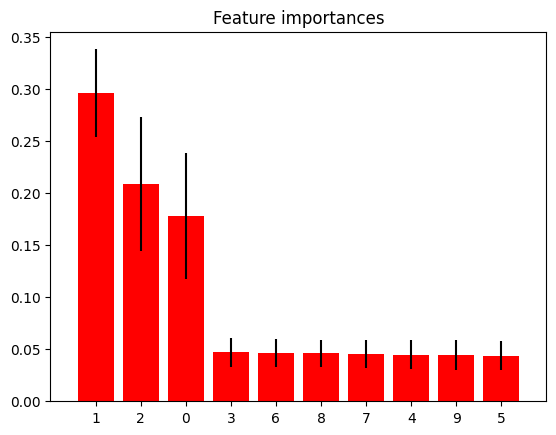

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

#boston = load_boston()

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X = data
y = target
#X = pd.DataFrame(boston.data, columns=boston.feature_names)
#y = boston.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


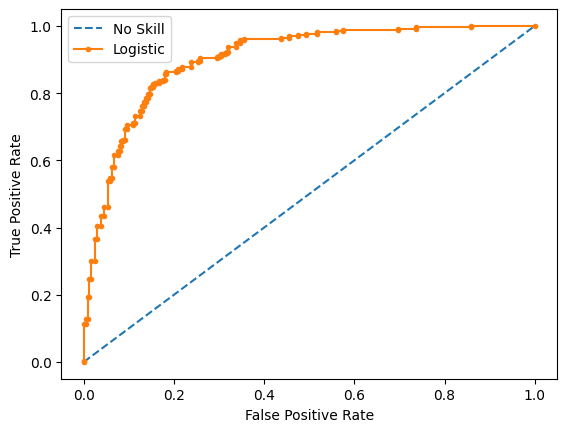

In [2]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(
    X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

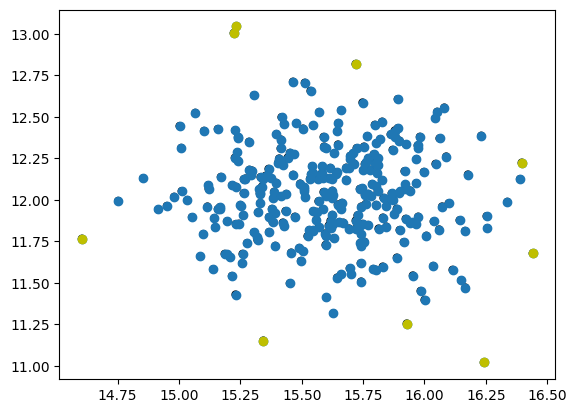

In [3]:
from sklearn.datasets import make_blobs
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

random.seed(17)
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(20, 5))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=_, s=25, edgecolor="k")

iiff= IsolationForest(n_estimators=100, contamination=.03)
predictions = iiff.fit_predict(X)

outlier_index = where(predictions == -1)
values = X[outlier_index]
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(values[:, 0], values[:, 1], color='y')
plt.show()

In [4]:
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest

# 데이터 로드
iris = load_iris()
X = iris.data

# 이상치 탐지 모델 생성
clf = IsolationForest(n_estimators=100, contamination=.03,
                      random_state=0).fit(X)

# 이상치 탐지
outliers = clf.predict(X) == -1

# 결과 출력
print('outliers:', outliers.sum())
print('outlier indices:', np.where(outliers))

from sklearn import svm
import numpy as np

# 랜덤으로 데이터 생성
X = 0.3 * np.random.randn(1000, 2)
X_train = np.r_[X + 2, X - 2]
X_test = np.r_[X + 2, X - 2]

# One-class SVM 모델 훈련
clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(X_train)

# 테스트 데이터 예측
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# 이상치 비율 계산
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
error_rate_train = n_error_train / y_pred_train.size
error_rate_test = n_error_test / y_pred_test.size

# 결과 출력
print("ratio (training data):", error_rate_train)
print("ratio (test data):", error_rate_test)

outliers: 5
outlier indices: (array([ 13,  41, 117, 118, 131], dtype=int64),)
ratio (training data): 0.01
ratio (test data): 0.01


!pip install tensorflow

!pip install minisom

!pip install bokeh

In [ ]:
from tensorflow.keras.models import Sequential, Model
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import lightgbm as lgb
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import random
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.utils.multiclass import unique_labels
from minisom import MiniSom
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D
from bokeh.colors import RGB
from bokeh.io import curdoc, show, output_notebook
from bokeh.transform import factor_mark, factor_cmap
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, output_file
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(y)
amax = np.amax(X)
print(amax)
X = X/amax

aarray = unique_labels(y)
print(len(aarray))

som_shape = (7, 7)
# initialization and training of 7x7 SOM
som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=1.5, learning_rate=.7, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)
som.train(X, 1000, verbose=True)

xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(111)
ax.set_aspect('equal')
# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hexa = RegularPolygon((xx[(i, j)], wy),
                              numVertices=6,
                              radius=0.95 / np.sqrt(3),
                              facecolor=cm.Blues(umatrix[i, j]),
                              alpha=0.4,
                              edgecolor='gray')
        ax.add_patch(hexa)

markers = [".", "o", "v", "^", "<", ">", "s", "p", "P", "*", "h", "H", "+",
           "x", "X", "D", "d", "|", "_", "1", "2", "3", "4", "8",
           0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
colors = ['C'+str(i) for i in range(len(markers))]

for cnt, x in enumerate(X):
    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w)
    wy = wy * np.sqrt(3) / 2
    plt.plot(wx, wy,
             markers[y[cnt]],
             markerfacecolor='None',
             markeredgecolor=colors[y[cnt]],
             markersize=12,
             markeredgewidth=2)

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * np.sqrt(3) / 2, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues,
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)
legend_elements = [Line2D([0], [0], marker=markers[i], color=colors[i], label=str(i),
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2) for i in range(len(aarray))]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.1, 1.08), loc='upper left',
          borderaxespad=0., ncol=3, fontsize=14)
# plt.savefig('som_seed_hex.png')
plt.show()

# Plotting the response for each pattern in the iris dataset
plt.bone()
plt.pcolor(som.distance_map().T)  # plotting the distance map as background
plt.colorbar()
plt.bone()

plt.pcolor(som.distance_map().T)  # distance map as background
plt.colorbar()
# loading the labels
# use different colors and markers for each label
for cnt, xx in enumerate(X):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[y[cnt]], markerfacecolor='None',
             markeredgecolor=colors[y[cnt]], markersize=12, markeredgewidth=2)
#plt.axis([0, 7, 0, 7])
plt.show()

if True:
    som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=1.5, learning_rate=.7,           activation_distance='euclidean',
                  neighborhood_function='gaussian', random_seed=10)
    max_iter = 1000
    q_error = []
    t_error = []
    for i in range(max_iter):
        rand_i = np.random.randint(len(X))
        som.update(X[rand_i], som.winner(X[rand_i]), i, max_iter)
        q_error.append(som.quantization_error(X))
        t_error.append(som.topographic_error(X))
    plt.plot(np.arange(max_iter), q_error, label='Quantization error')
    plt.plot(np.arange(max_iter), t_error, label='Topographic error')
    plt.ylabel('Error')
    plt.xlabel('Iteration')
    plt.legend()
    plt.show()

sns.set()
sns.set(rc={"figure.figsize": (10, 8)})
sns.set(font_scale=1.5)
PALETTE = sns.color_palette('deep', n_colors=5)
CMAP = ListedColormap(PALETTE.as_hex())
RANDOM_STATE = 42


def plot_iris_2d(xx, yy, y, title):
    markers = [".", "o", "v", "^", "<", ">", "s", "p", "P", "*", "h", "H", "+",
               "x", "X", "D", "d", "|", "_", "1", "2", "3", "4", "8",
               0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    colors = ['C'+str(i) for i in range(len(markers))]
    sns.set_style("darkgrid")
#    plt.scatter(xx, yy, c=y, cmap=CMAP, s=70)
    for i in range(len(unique_labels(y))):
        plt.scatter(xx[y == i], yy[y == i], color=colors[i],
                    alpha=0.8, lw=2, label=str(i))
    plt.title(title, fontsize=20)
    plt.xlabel("1st axis", fontsize=16)
    plt.ylabel("2nd axis", fontsize=16)
    plt.legend(loc="best", shadow=False, scatterpoints=1)


def plot_iris_3d(xx, yy, zz, y, title):
    markers = [".", "o", "v", "^", "<", ">", "s", "p", "P", "*", "h", "H", "+",
               "x", "X", "D", "d", "|", "_", "1", "2", "3", "4", "8",
               0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    colors = ['C'+str(i) for i in range(len(markers))]
    sns.set_style('whitegrid')
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
#    ax.scatter(xx, yy, zz, c=y, cmap=CMAP, s=40)
    for i in range(len(unique_labels(y))):
        ax.scatter(xx[y == i], yy[y == i], zz[y == i], color=colors[i],
                   alpha=0.8, lw=2, label=str(i))
    ax.set_title(title, fontsize=20)
    fsize = 14
    ax.set_xlabel("1st axis", fontsize=fsize)
    ax.set_ylabel("2nd axis", fontsize=fsize)
    ax.set_zlabel("3rd axis", fontsize=fsize)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.legend(loc="best", shadow=False, scatterpoints=1)


pca = PCA(n_components=2)
points = pca.fit_transform(X)
plot_iris_2d(points[:, 0], points[:, 1], y,
             title='dataset visualized with PCA')

tsne = TSNE(n_components=2, random_state=RANDOM_STATE)
points = tsne.fit_transform(X)
plot_iris_2d(points[:, 0], points[:, 1], y,
             title='dataset visualized with TSNE')

pca = PCA(n_components=3)
points = pca.fit_transform(X)
plot_iris_3d(points[:, 0], points[:, 1], points[:, 2],
             y, title="dataset visualized with PCA")

tsne = TSNE(n_components=3,  n_iter=2000, random_state=RANDOM_STATE)
points = tsne.fit_transform(X)
plot_iris_3d(points[:, 0], points[:, 1], points[:, 2],
             y, title="dataset visualized with TSNE")

clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 2), xytext=(3, 5), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 2), xytext=(5, 5), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

#from sklearn.preprocessing import MinMaxScaler

# synthetic classification dataset
#from sklearn.datasets import make_classification
# define dataset
#X, y = make_classification(n_samples=2000, n_features=30, n_informative=10, n_redundant=10, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

num_inputs = X.shape[1]
num_hidden = 2
num_outputs = num_inputs

model = Sequential()
model.add(Dense(num_inputs, input_shape=[num_inputs]))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(num_hidden, activation='relu'))
model.add(Dense(10,  activation='relu'))
model.add(Dense(25,  activation='relu'))
model.add(Dense(50,  activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_outputs, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')
model.summary()
history = model.fit(X, X, validation_split=0.20,
                    epochs=250, batch_size=5, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

intermediate_layer_model = Model(
    inputs=model.input, outputs=model.get_layer(index=5).output)
intermediate_output = intermediate_layer_model.predict(X)

intermediate_output.shape
sns.scatterplot(intermediate_output[:, 0], intermediate_output[:, 1], hue=y)


YY = tf.keras.utils.to_categorical(y)

YY.shape
nfeatures = X.shape[1]

x_train, x_test, y_train, y_test = train_test_split(X, YY, test_size=0.2)
model = Sequential()
model.add(Dense(100, input_dim=nfeatures, activation='relu'))
for i in range(4):
    model.add(Dense(100, activation='relu'))
model.add(Dense(YY.shape[1], activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.10,
                    epochs=100, batch_size=5, verbose=2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='lower right', bbox_to_anchor=(
    0.6, 0.2), ncol=1, frameon=True, shadow=True, fontsize=14)
plt.show()
if True:
    model.save_weights("model.h5")
    print("saved model to disk")

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(confusion_matrix(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5,
            square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion matrix - ' + \
    str(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)
plt.show()
print(metrics.classification_report(y_test, y_pred))

print(np.shape(X))
print(np.shape(y))
le = preprocessing.LabelEncoder()
y_label = le.fit_transform(y)
classes = le.classes_
len(list(le.classes_))
x_train, x_test, y_train, y_test = train_test_split(
    X, y_label, test_size=0.30, random_state=42)

params = {
    "objective": "multiclass",
    "num_class": len(list(le.classes_)),
    "num_leaves": 60,
    "max_depth": -1,
    "learning_rate": 0.01,
    "bagging_fraction": 0.9,  # subsample
    "feature_fraction": 0.9,  # colsample_bytree
    "bagging_freq": 5,        # subsample_freq
    "bagging_seed": 2018,
    "verbosity": -1}

lgtrain, lgval = lgb.Dataset(x_train, y_train), lgb.Dataset(x_test, y_test)
lgbmodel = lgb.train(params, lgtrain, 2000, valid_sets=[
                     lgtrain, lgval], early_stopping_rounds=100, verbose_eval=200)


y_pred = np.argmax(lgbmodel.predict(x_test), axis=1)
y_true = y_test


def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


plot_confusion_matrix(y_true, y_pred, classes=classes,
                      title='Confusion matrix')
accuracy_score(y_true, y_pred)

plt.rcParams["figure.figsize"] = (12, 22)
lgb.plot_importance(lgbmodel, max_num_features=x_test.shape[1], height=.9)

In [ ]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)
target_ids = range(len(digits.target_names))

plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

이공학적 설계를 위한 인공지능 최적화
(Artificial Intelligence and Optimization Techniques for Engineering Design)

Chapter 5

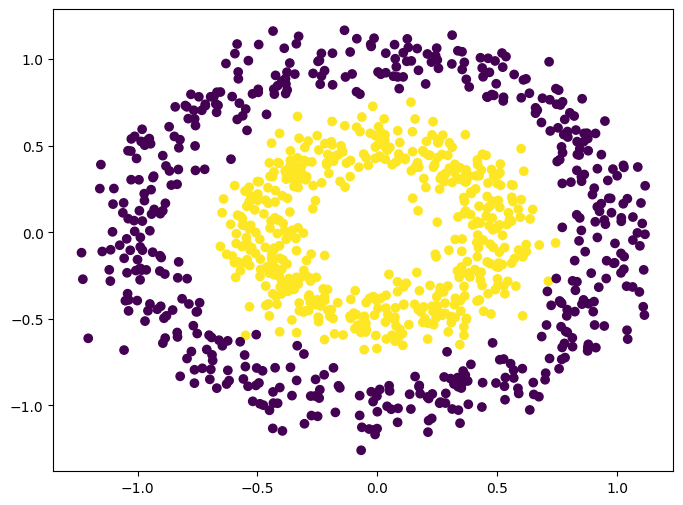

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - acc: 0.9939 - loss: 0.1761
[0.1766291707754135, 0.9919999837875366]
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - acc: 0.5706 - loss: 0.6901
[0.6903905868530273, 0.5590000152587891]
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - acc: 0.9942 - loss: 0.0169
[0.017016923055052757, 0.9940000176429749]


In [16]:
import tensorflow
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Input
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential

from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

model = Sequential([
    Input(shape=(2,)),
    Dense(5, "relu"),
    Dense(1, "sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X, y, batch_size=32, epochs=100, verbose=0)
print(model.evaluate(X, y))


model = Sequential([
    Input(shape=(2,)),
    Dense(5, "sigmoid"),
    Dense(5, "sigmoid"),
    Dense(5, "sigmoid"),
    Dense(1, "sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X, y, batch_size=32, epochs=100, verbose=0)
print(model.evaluate(X, y))


model = Sequential([
    Input(shape=(2,)),
    Dense(5, "relu"),
    Dense(5, "relu"),
    Dense(5, "relu"),
    Dense(1, "sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X, y, batch_size=32, epochs=100, verbose=0)
print(model.evaluate(X, y))

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
#(x_train, y_train), (x_test, y_test) = tf.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train = tf.one_hot(y_train, depth=len(np.unique(y_train)))
y_test = tf.one_hot(y_test, depth=len(np.unique(y_train)))
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam', metrics=['accuracy'])

# CPU
print("CPU")
with tf.device("/device:CPU:0"):
    model.fit(x_train, y_train, batch_size=1000, epochs=20)

print("GPU")
with tf.device("/device:GPU:0"):
    model.fit(x_train, y_train, batch_size=1000, epochs=20)

CPU
Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6078 - loss: 16.1893
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8796 - loss: 1.3706
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9056 - loss: 0.7864
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9254 - loss: 0.5106
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9401 - loss: 0.3731
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9466 - loss: 0.3011
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9555 - loss: 0.2442
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9598 - loss: 0.1938
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9623 - loss: 0.1693
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9715 - loss: 0.1248
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9724 - loss: 0.1168
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9773

In [18]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

import tensorflow as tf
print(tf.test.is_gpu_available())
print(tf.test.gpu_device_name())
tf.config.experimental.list_physical_devices(device_type='GPU')

import tensorflow
print(tensorflow.__version__)
import tensorflow.python.platform.build_info as build
print(build.build_info)

import tensorflow as tf
tf.test.is_gpu_available()
tf.test.is_built_with_cuda()

tf.config.list_physical_devices('GPU')
tf.config.list_physical_devices('CPU')

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False

2.16.1
OrderedDict({'is_cuda_build': False, 'is_rocm_build': False, 'is_tensorrt_build': False, 'msvcp_dll_names': 'msvcp140.dll,msvcp140_1.dll'})
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10238910566330568039
xla_global_id: -1
]


C:\Users\In-Ho Lee\anaconda3\envs\testAI\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.207, Test: 0.231


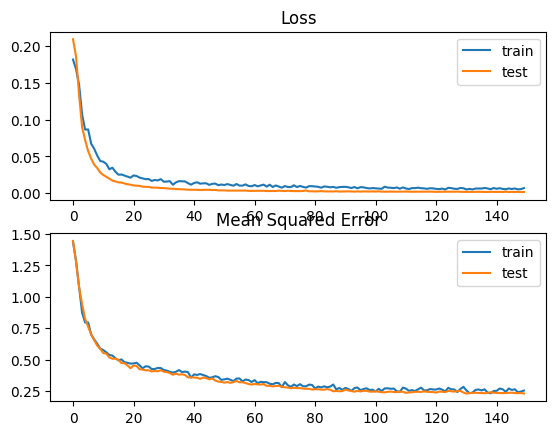

In [19]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=20,
                       noise=0.1, random_state=1)

X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y), 1))[:, 0]

n_train = 800
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(25, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error',optimizer=opt, metrics=['mse'])
history = model.fit(trainX, trainy, validation_data=(
    testX, testy), epochs=150, verbose=0)
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.1154 - loss: 2.2986 - val_accuracy: 0.2430 - val_loss: 2.2710
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.1997 - loss: 2.2658 - val_accuracy: 0.3733 - val_loss: 2.2283
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.2782 - loss: 2.2243 - val_accuracy: 0.4693 - val_loss: 2.1699
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.3501 - loss: 2.1654 - val_accuracy: 0.5215 - val_loss: 2.0893
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.4069 - loss: 2.0857 - val_accuracy: 0.5662 - val_loss: 1.9790
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.4640 - loss: 1.9770 - val_accuracy: 0.6255 - val_loss: 1.8302
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.5234 - loss: 1.8374 - val_accuracy: 0.6832 - val_loss: 1.6408
Epoch 8/10
469/46

  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


  0%|▏                                                                                 | 1/500 [00:01<10:19,  1.24s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


  0%|▎                                                                                 | 2/500 [00:02<09:17,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


  1%|▍                                                                                 | 3/500 [00:03<08:47,  1.06s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


  1%|▋                                                                                 | 4/500 [00:04<08:35,  1.04s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


  1%|▊                                                                                 | 5/500 [00:05<08:25,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


  1%|▉                                                                                 | 6/500 [00:06<08:19,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


  1%|█▏                                                                                | 7/500 [00:07<08:12,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


  2%|█▎                                                                                | 8/500 [00:08<08:23,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


  2%|█▍                                                                                | 9/500 [00:09<08:18,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


  2%|█▌                                                                               | 10/500 [00:10<08:14,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


  2%|█▊                                                                               | 11/500 [00:11<08:12,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


  2%|█▉                                                                               | 12/500 [00:12<08:08,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


  3%|██                                                                               | 13/500 [00:13<08:05,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


  3%|██▎                                                                              | 14/500 [00:14<08:03,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


  3%|██▍                                                                              | 15/500 [00:15<08:02,  1.01it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


  3%|██▌                                                                              | 16/500 [00:16<08:02,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


  3%|██▊                                                                              | 17/500 [00:17<08:02,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


  4%|██▉                                                                              | 18/500 [00:18<08:00,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


  4%|███                                                                              | 19/500 [00:19<08:08,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


  4%|███▏                                                                             | 20/500 [00:20<08:04,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


  4%|███▍                                                                             | 21/500 [00:21<08:01,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


  4%|███▌                                                                             | 22/500 [00:22<07:59,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


  5%|███▋                                                                             | 23/500 [00:23<07:59,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


  5%|███▉                                                                             | 24/500 [00:24<07:57,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


  5%|████                                                                             | 25/500 [00:25<07:50,  1.01it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


  5%|████▏                                                                            | 26/500 [00:26<07:43,  1.02it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


  5%|████▎                                                                            | 27/500 [00:27<07:42,  1.02it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


  6%|████▌                                                                            | 28/500 [00:28<07:36,  1.03it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


  6%|████▋                                                                            | 29/500 [00:29<07:32,  1.04it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


  6%|████▊                                                                            | 30/500 [00:30<07:37,  1.03it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


  6%|█████                                                                            | 31/500 [00:31<07:33,  1.03it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


  6%|█████▏                                                                           | 32/500 [00:31<07:29,  1.04it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


  7%|█████▎                                                                           | 33/500 [00:32<07:26,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


  7%|█████▌                                                                           | 34/500 [00:33<07:25,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


  7%|█████▋                                                                           | 35/500 [00:34<07:21,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


  7%|█████▊                                                                           | 36/500 [00:35<07:21,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


  7%|█████▉                                                                           | 37/500 [00:36<07:20,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


  8%|██████▏                                                                          | 38/500 [00:37<07:19,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


  8%|██████▎                                                                          | 39/500 [00:38<07:18,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


  8%|██████▍                                                                          | 40/500 [00:39<07:16,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


  8%|██████▋                                                                          | 41/500 [00:40<07:15,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


  8%|██████▊                                                                          | 42/500 [00:41<07:21,  1.04it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


  9%|██████▉                                                                          | 43/500 [00:42<07:17,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


  9%|███████▏                                                                         | 44/500 [00:43<07:11,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


  9%|███████▎                                                                         | 45/500 [00:44<07:08,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


  9%|███████▍                                                                         | 46/500 [00:45<07:06,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


  9%|███████▌                                                                         | 47/500 [00:46<07:09,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


 10%|███████▊                                                                         | 48/500 [00:47<07:07,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


 10%|███████▉                                                                         | 49/500 [00:48<07:03,  1.07it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


 10%|████████                                                                         | 50/500 [00:49<07:05,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


 10%|████████▎                                                                        | 51/500 [00:49<07:04,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


 10%|████████▍                                                                        | 52/500 [00:50<07:02,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


 11%|████████▌                                                                        | 53/500 [00:51<07:04,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 11%|████████▋                                                                        | 54/500 [00:52<07:08,  1.04it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


 11%|████████▉                                                                        | 55/500 [00:53<07:07,  1.04it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


 11%|█████████                                                                        | 56/500 [00:54<07:04,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


 11%|█████████▏                                                                       | 57/500 [00:55<07:04,  1.04it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


 12%|█████████▍                                                                       | 58/500 [00:56<07:01,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


 12%|█████████▌                                                                       | 59/500 [00:57<06:59,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


 12%|█████████▋                                                                       | 60/500 [00:58<06:59,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


 12%|█████████▉                                                                       | 61/500 [00:59<06:58,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


 12%|██████████                                                                       | 62/500 [01:00<06:53,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


 13%|██████████▏                                                                      | 63/500 [01:01<06:49,  1.07it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


 13%|██████████▎                                                                      | 64/500 [01:02<06:49,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


 13%|██████████▌                                                                      | 65/500 [01:03<06:47,  1.07it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 13%|██████████▋                                                                      | 66/500 [01:04<06:58,  1.04it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


 13%|██████████▊                                                                      | 67/500 [01:05<06:57,  1.04it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


 14%|███████████                                                                      | 68/500 [01:06<06:52,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


 14%|███████████▏                                                                     | 69/500 [01:07<06:48,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


 14%|███████████▎                                                                     | 70/500 [01:08<06:47,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


 14%|███████████▌                                                                     | 71/500 [01:09<06:44,  1.06it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


 14%|███████████▋                                                                     | 72/500 [01:09<06:47,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


 15%|███████████▊                                                                     | 73/500 [01:11<07:07,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


 15%|███████████▉                                                                     | 74/500 [01:12<07:01,  1.01it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


 15%|████████████▏                                                                    | 75/500 [01:12<06:53,  1.03it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


 15%|████████████▎                                                                    | 76/500 [01:13<06:48,  1.04it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 15%|████████████▍                                                                    | 77/500 [01:14<06:48,  1.04it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 16%|████████████▋                                                                    | 78/500 [01:15<06:51,  1.02it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


 16%|████████████▊                                                                    | 79/500 [01:16<06:46,  1.04it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


 16%|████████████▉                                                                    | 80/500 [01:17<06:41,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


 16%|█████████████                                                                    | 81/500 [01:18<06:37,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


 16%|█████████████▎                                                                   | 82/500 [01:19<06:39,  1.05it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


 17%|█████████████▍                                                                   | 83/500 [01:21<07:52,  1.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 17%|█████████████▌                                                                   | 84/500 [01:22<07:39,  1.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 17%|█████████████▊                                                                   | 85/500 [01:23<07:28,  1.08s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 17%|█████████████▉                                                                   | 86/500 [01:24<07:17,  1.06s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 17%|██████████████                                                                   | 87/500 [01:25<07:11,  1.05s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


 18%|██████████████▎                                                                  | 88/500 [01:26<07:20,  1.07s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 18%|██████████████▍                                                                  | 89/500 [01:27<07:14,  1.06s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


 18%|██████████████▌                                                                  | 90/500 [01:28<07:57,  1.17s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


 18%|██████████████▋                                                                  | 91/500 [01:30<08:19,  1.22s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


 18%|██████████████▉                                                                  | 92/500 [01:31<08:50,  1.30s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step


 19%|███████████████                                                                  | 93/500 [01:33<09:10,  1.35s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 19%|███████████████▏                                                                 | 94/500 [01:34<08:36,  1.27s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


 19%|███████████████▍                                                                 | 95/500 [01:35<08:57,  1.33s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


 19%|███████████████▌                                                                 | 96/500 [01:37<09:10,  1.36s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


 19%|███████████████▋                                                                 | 97/500 [01:38<09:26,  1.41s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


 20%|███████████████▉                                                                 | 98/500 [01:40<09:27,  1.41s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


 20%|████████████████                                                                 | 99/500 [01:41<09:17,  1.39s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


 20%|████████████████                                                                | 100/500 [01:42<09:11,  1.38s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


 20%|████████████████▏                                                               | 101/500 [01:44<09:14,  1.39s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


 20%|████████████████▎                                                               | 102/500 [01:45<09:19,  1.40s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


 21%|████████████████▍                                                               | 103/500 [01:47<09:13,  1.39s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


 21%|████████████████▋                                                               | 104/500 [01:48<09:13,  1.40s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 21%|████████████████▊                                                               | 105/500 [01:49<08:28,  1.29s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step


 21%|████████████████▉                                                               | 106/500 [01:50<08:18,  1.26s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 21%|█████████████████                                                               | 107/500 [01:51<07:42,  1.18s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 22%|█████████████████▎                                                              | 108/500 [01:52<07:25,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 22%|█████████████████▍                                                              | 109/500 [01:53<07:08,  1.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


 22%|█████████████████▌                                                              | 110/500 [01:54<07:31,  1.16s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


 22%|█████████████████▊                                                              | 111/500 [01:56<07:57,  1.23s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


 22%|█████████████████▉                                                              | 112/500 [01:57<08:07,  1.26s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 23%|██████████████████                                                              | 113/500 [01:58<07:38,  1.18s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


 23%|██████████████████▏                                                             | 114/500 [02:00<08:02,  1.25s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


 23%|██████████████████▍                                                             | 115/500 [02:01<08:21,  1.30s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step


 23%|██████████████████▌                                                             | 116/500 [02:02<08:35,  1.34s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step


 23%|██████████████████▋                                                             | 117/500 [02:04<08:43,  1.37s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


 24%|██████████████████▉                                                             | 118/500 [02:05<08:47,  1.38s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step


 24%|███████████████████                                                             | 119/500 [02:07<08:56,  1.41s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


 24%|███████████████████▏                                                            | 120/500 [02:08<08:52,  1.40s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step


 24%|███████████████████▎                                                            | 121/500 [02:10<08:46,  1.39s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


 24%|███████████████████▌                                                            | 122/500 [02:11<08:47,  1.40s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step


 25%|███████████████████▋                                                            | 123/500 [02:12<08:55,  1.42s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 25%|███████████████████▊                                                            | 124/500 [02:13<08:12,  1.31s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


 25%|████████████████████                                                            | 125/500 [02:15<07:48,  1.25s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


 25%|████████████████████▏                                                           | 126/500 [02:16<07:59,  1.28s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


 25%|████████████████████▎                                                           | 127/500 [02:17<07:23,  1.19s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


 26%|████████████████████▍                                                           | 128/500 [02:18<06:55,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


 26%|████████████████████▋                                                           | 129/500 [02:19<07:12,  1.17s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


 26%|████████████████████▊                                                           | 130/500 [02:21<07:38,  1.24s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


 26%|████████████████████▉                                                           | 131/500 [02:22<07:27,  1.21s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


 26%|█████████████████████                                                           | 132/500 [02:23<07:19,  1.19s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 27%|█████████████████████▎                                                          | 133/500 [02:24<07:01,  1.15s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


 27%|█████████████████████▍                                                          | 134/500 [02:25<07:04,  1.16s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


 27%|█████████████████████▌                                                          | 135/500 [02:26<07:06,  1.17s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


 27%|█████████████████████▊                                                          | 136/500 [02:27<07:08,  1.18s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


 27%|█████████████████████▉                                                          | 137/500 [02:29<07:06,  1.17s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


 28%|██████████████████████                                                          | 138/500 [02:30<07:06,  1.18s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


 28%|██████████████████████▏                                                         | 139/500 [02:31<07:02,  1.17s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


 28%|██████████████████████▍                                                         | 140/500 [02:32<06:57,  1.16s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


 28%|██████████████████████▌                                                         | 141/500 [02:33<06:51,  1.15s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step


 28%|██████████████████████▋                                                         | 142/500 [02:34<06:55,  1.16s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


 29%|██████████████████████▉                                                         | 143/500 [02:36<06:52,  1.16s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


 29%|███████████████████████                                                         | 144/500 [02:37<06:47,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


 29%|███████████████████████▏                                                        | 145/500 [02:38<06:43,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


 29%|███████████████████████▎                                                        | 146/500 [02:39<06:57,  1.18s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 29%|███████████████████████▌                                                        | 147/500 [02:40<06:40,  1.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


 30%|███████████████████████▋                                                        | 148/500 [02:41<06:48,  1.16s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 30%|███████████████████████▊                                                        | 149/500 [02:42<06:38,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step


 30%|████████████████████████                                                        | 150/500 [02:44<06:42,  1.15s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


 30%|████████████████████████▏                                                       | 151/500 [02:45<06:33,  1.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


 30%|████████████████████████▎                                                       | 152/500 [02:46<06:29,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 31%|████████████████████████▍                                                       | 153/500 [02:47<06:20,  1.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


 31%|████████████████████████▋                                                       | 154/500 [02:48<06:24,  1.11s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


 31%|████████████████████████▊                                                       | 155/500 [02:49<06:22,  1.11s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


 31%|████████████████████████▉                                                       | 156/500 [02:50<06:39,  1.16s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 31%|█████████████████████████                                                       | 157/500 [02:51<06:27,  1.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


 32%|█████████████████████████▎                                                      | 158/500 [02:53<06:23,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


 32%|█████████████████████████▍                                                      | 159/500 [02:54<06:45,  1.19s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


 32%|█████████████████████████▌                                                      | 160/500 [02:55<07:01,  1.24s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


 32%|█████████████████████████▊                                                      | 161/500 [02:57<07:07,  1.26s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


 32%|█████████████████████████▉                                                      | 162/500 [02:58<07:23,  1.31s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


 33%|██████████████████████████                                                      | 163/500 [02:59<07:06,  1.26s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 33%|██████████████████████████▏                                                     | 164/500 [03:00<06:47,  1.21s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 33%|██████████████████████████▍                                                     | 165/500 [03:01<06:32,  1.17s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


 33%|██████████████████████████▌                                                     | 166/500 [03:03<06:41,  1.20s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 33%|██████████████████████████▋                                                     | 167/500 [03:04<06:27,  1.16s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 34%|██████████████████████████▉                                                     | 168/500 [03:05<06:16,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


 34%|███████████████████████████                                                     | 169/500 [03:06<06:10,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 34%|███████████████████████████▏                                                    | 170/500 [03:07<06:02,  1.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 34%|███████████████████████████▎                                                    | 171/500 [03:08<06:00,  1.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


 34%|███████████████████████████▌                                                    | 172/500 [03:09<05:59,  1.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


 35%|███████████████████████████▋                                                    | 173/500 [03:10<06:02,  1.11s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


 35%|███████████████████████████▊                                                    | 174/500 [03:11<06:04,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 35%|████████████████████████████                                                    | 175/500 [03:12<06:00,  1.11s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


 35%|████████████████████████████▏                                                   | 176/500 [03:14<06:29,  1.20s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


 35%|████████████████████████████▎                                                   | 177/500 [03:15<06:40,  1.24s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 36%|████████████████████████████▍                                                   | 178/500 [03:16<06:25,  1.20s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 36%|████████████████████████████▋                                                   | 179/500 [03:17<06:13,  1.16s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


 36%|████████████████████████████▊                                                   | 180/500 [03:18<06:04,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


 36%|████████████████████████████▉                                                   | 181/500 [03:20<06:19,  1.19s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


 36%|█████████████████████████████                                                   | 182/500 [03:21<06:20,  1.20s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


 37%|█████████████████████████████▎                                                  | 183/500 [03:22<06:15,  1.18s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


 37%|█████████████████████████████▍                                                  | 184/500 [03:23<06:12,  1.18s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


 37%|█████████████████████████████▌                                                  | 185/500 [03:25<06:28,  1.23s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


 37%|█████████████████████████████▊                                                  | 186/500 [03:26<06:16,  1.20s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 37%|█████████████████████████████▉                                                  | 187/500 [03:27<06:00,  1.15s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 38%|██████████████████████████████                                                  | 188/500 [03:28<05:52,  1.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 38%|██████████████████████████████▏                                                 | 189/500 [03:29<05:46,  1.11s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


 38%|██████████████████████████████▍                                                 | 190/500 [03:30<06:02,  1.17s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


 38%|██████████████████████████████▌                                                 | 191/500 [03:31<06:06,  1.19s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 38%|██████████████████████████████▋                                                 | 192/500 [03:32<05:52,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


 39%|██████████████████████████████▉                                                 | 193/500 [03:34<05:47,  1.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


 39%|███████████████████████████████                                                 | 194/500 [03:35<05:44,  1.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 39%|███████████████████████████████▏                                                | 195/500 [03:36<05:40,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


 39%|███████████████████████████████▎                                                | 196/500 [03:37<05:56,  1.17s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 39%|███████████████████████████████▌                                                | 197/500 [03:38<05:45,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 40%|███████████████████████████████▋                                                | 198/500 [03:39<05:38,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


 40%|███████████████████████████████▊                                                | 199/500 [03:40<05:30,  1.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 40%|████████████████████████████████                                                | 200/500 [03:41<05:22,  1.08s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


 40%|████████████████████████████████▏                                               | 201/500 [03:42<05:24,  1.09s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


 40%|████████████████████████████████▎                                               | 202/500 [03:44<05:25,  1.09s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


 41%|████████████████████████████████▍                                               | 203/500 [03:45<05:28,  1.11s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


 41%|████████████████████████████████▋                                               | 204/500 [03:46<05:30,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


 41%|████████████████████████████████▊                                               | 205/500 [03:47<05:33,  1.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


 41%|████████████████████████████████▉                                               | 206/500 [03:48<05:30,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


 41%|█████████████████████████████████                                               | 207/500 [03:49<05:28,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


 42%|█████████████████████████████████▎                                              | 208/500 [03:50<05:28,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


 42%|█████████████████████████████████▍                                              | 209/500 [03:51<05:21,  1.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


 42%|█████████████████████████████████▌                                              | 210/500 [03:53<05:46,  1.19s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 42%|█████████████████████████████████▊                                              | 211/500 [03:54<05:34,  1.16s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 42%|█████████████████████████████████▉                                              | 212/500 [03:55<05:26,  1.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


 43%|██████████████████████████████████                                              | 213/500 [03:56<05:23,  1.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


 43%|██████████████████████████████████▏                                             | 214/500 [03:57<05:19,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


 43%|██████████████████████████████████▍                                             | 215/500 [03:58<05:21,  1.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


 43%|██████████████████████████████████▌                                             | 216/500 [04:00<05:46,  1.22s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 43%|██████████████████████████████████▋                                             | 217/500 [04:01<05:32,  1.18s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


 44%|██████████████████████████████████▉                                             | 218/500 [04:02<05:26,  1.16s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


 44%|███████████████████████████████████                                             | 219/500 [04:03<05:26,  1.16s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


 44%|███████████████████████████████████▏                                            | 220/500 [04:04<05:19,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


 44%|███████████████████████████████████▎                                            | 221/500 [04:05<05:14,  1.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 44%|███████████████████████████████████▌                                            | 222/500 [04:06<05:08,  1.11s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 45%|███████████████████████████████████▋                                            | 223/500 [04:07<05:04,  1.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step


 45%|███████████████████████████████████▊                                            | 224/500 [04:09<05:10,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


 45%|████████████████████████████████████                                            | 225/500 [04:10<05:05,  1.11s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


 45%|████████████████████████████████████▏                                           | 226/500 [04:11<05:00,  1.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


 45%|████████████████████████████████████▎                                           | 227/500 [04:12<04:58,  1.09s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


 46%|████████████████████████████████████▍                                           | 228/500 [04:13<04:55,  1.09s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


 46%|████████████████████████████████████▋                                           | 229/500 [04:14<04:56,  1.09s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 46%|████████████████████████████████████▊                                           | 230/500 [04:15<04:55,  1.09s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 46%|████████████████████████████████████▉                                           | 231/500 [04:16<04:49,  1.08s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 46%|█████████████████████████████████████                                           | 232/500 [04:17<04:42,  1.06s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 47%|█████████████████████████████████████▎                                          | 233/500 [04:18<04:37,  1.04s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 47%|█████████████████████████████████████▍                                          | 234/500 [04:19<04:35,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 47%|█████████████████████████████████████▌                                          | 235/500 [04:20<04:34,  1.04s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 47%|█████████████████████████████████████▊                                          | 236/500 [04:21<04:35,  1.04s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 47%|█████████████████████████████████████▉                                          | 237/500 [04:22<04:32,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 48%|██████████████████████████████████████                                          | 238/500 [04:23<04:27,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 48%|██████████████████████████████████████▏                                         | 239/500 [04:24<04:26,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 48%|██████████████████████████████████████▍                                         | 240/500 [04:25<04:24,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 48%|██████████████████████████████████████▌                                         | 241/500 [04:26<04:23,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 48%|██████████████████████████████████████▋                                         | 242/500 [04:27<04:22,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 49%|██████████████████████████████████████▉                                         | 243/500 [04:28<04:21,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 49%|███████████████████████████████████████                                         | 244/500 [04:29<04:19,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 49%|███████████████████████████████████████▏                                        | 245/500 [04:30<04:17,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 49%|███████████████████████████████████████▎                                        | 246/500 [04:31<04:16,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 49%|███████████████████████████████████████▌                                        | 247/500 [04:32<04:17,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 50%|███████████████████████████████████████▋                                        | 248/500 [04:33<04:18,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 50%|███████████████████████████████████████▊                                        | 249/500 [04:34<04:17,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 50%|████████████████████████████████████████                                        | 250/500 [04:36<04:16,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 50%|████████████████████████████████████████▏                                       | 251/500 [04:37<04:14,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 50%|████████████████████████████████████████▎                                       | 252/500 [04:38<04:12,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 51%|████████████████████████████████████████▍                                       | 253/500 [04:39<04:10,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 51%|████████████████████████████████████████▋                                       | 254/500 [04:40<04:09,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 51%|████████████████████████████████████████▊                                       | 255/500 [04:41<04:06,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 51%|████████████████████████████████████████▉                                       | 256/500 [04:42<04:05,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


 51%|█████████████████████████████████████████                                       | 257/500 [04:43<04:17,  1.06s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 52%|█████████████████████████████████████████▎                                      | 258/500 [04:44<04:12,  1.04s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


 52%|█████████████████████████████████████████▍                                      | 259/500 [04:45<04:12,  1.05s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 52%|█████████████████████████████████████████▌                                      | 260/500 [04:46<04:10,  1.04s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 52%|█████████████████████████████████████████▊                                      | 261/500 [04:47<04:06,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 52%|█████████████████████████████████████████▉                                      | 262/500 [04:48<04:03,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 53%|██████████████████████████████████████████                                      | 263/500 [04:49<04:00,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 53%|██████████████████████████████████████████▏                                     | 264/500 [04:50<03:58,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 53%|██████████████████████████████████████████▍                                     | 265/500 [04:51<03:56,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 53%|██████████████████████████████████████████▌                                     | 266/500 [04:52<03:56,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 53%|██████████████████████████████████████████▋                                     | 267/500 [04:53<03:53,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 54%|██████████████████████████████████████████▉                                     | 268/500 [04:54<03:51,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 54%|███████████████████████████████████████████                                     | 269/500 [04:55<03:51,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 54%|███████████████████████████████████████████▏                                    | 270/500 [04:56<03:51,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 54%|███████████████████████████████████████████▎                                    | 271/500 [04:57<03:54,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


 54%|███████████████████████████████████████████▌                                    | 272/500 [04:58<03:50,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 55%|███████████████████████████████████████████▋                                    | 273/500 [04:59<03:48,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 55%|███████████████████████████████████████████▊                                    | 274/500 [05:00<03:47,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


 55%|████████████████████████████████████████████                                    | 275/500 [05:01<03:44,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 55%|████████████████████████████████████████████▏                                   | 276/500 [05:02<03:44,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 55%|████████████████████████████████████████████▎                                   | 277/500 [05:03<03:42,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 56%|████████████████████████████████████████████▍                                   | 278/500 [05:04<03:41,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 56%|████████████████████████████████████████████▋                                   | 279/500 [05:05<03:40,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 56%|████████████████████████████████████████████▊                                   | 280/500 [05:06<03:39,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 56%|████████████████████████████████████████████▉                                   | 281/500 [05:07<03:38,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 56%|█████████████████████████████████████████████                                   | 282/500 [05:08<03:37,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


 57%|█████████████████████████████████████████████▎                                  | 283/500 [05:09<03:41,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 57%|█████████████████████████████████████████████▍                                  | 284/500 [05:10<03:39,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 57%|█████████████████████████████████████████████▌                                  | 285/500 [05:11<03:39,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 57%|█████████████████████████████████████████████▊                                  | 286/500 [05:12<03:36,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 57%|█████████████████████████████████████████████▉                                  | 287/500 [05:13<03:35,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 58%|██████████████████████████████████████████████                                  | 288/500 [05:14<03:32,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 58%|██████████████████████████████████████████████▏                                 | 289/500 [05:15<03:31,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 58%|██████████████████████████████████████████████▍                                 | 290/500 [05:16<03:32,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 58%|██████████████████████████████████████████████▌                                 | 291/500 [05:17<03:29,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 58%|██████████████████████████████████████████████▋                                 | 292/500 [05:18<03:28,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 59%|██████████████████████████████████████████████▉                                 | 293/500 [05:19<03:28,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 59%|███████████████████████████████████████████████                                 | 294/500 [05:20<03:25,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


 59%|███████████████████████████████████████████████▏                                | 295/500 [05:21<03:28,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 59%|███████████████████████████████████████████████▎                                | 296/500 [05:22<03:27,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 59%|███████████████████████████████████████████████▌                                | 297/500 [05:23<03:25,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 60%|███████████████████████████████████████████████▋                                | 298/500 [05:24<03:23,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


 60%|███████████████████████████████████████████████▊                                | 299/500 [05:25<03:20,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 60%|████████████████████████████████████████████████                                | 300/500 [05:26<03:20,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 60%|████████████████████████████████████████████████▏                               | 301/500 [05:27<03:20,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 60%|████████████████████████████████████████████████▎                               | 302/500 [05:28<03:20,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 61%|████████████████████████████████████████████████▍                               | 303/500 [05:29<03:18,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 61%|████████████████████████████████████████████████▋                               | 304/500 [05:30<03:17,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 61%|████████████████████████████████████████████████▊                               | 305/500 [05:31<03:16,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 61%|████████████████████████████████████████████████▉                               | 306/500 [05:32<03:16,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 61%|█████████████████████████████████████████████████                               | 307/500 [05:33<03:17,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 62%|█████████████████████████████████████████████████▎                              | 308/500 [05:34<03:15,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 62%|█████████████████████████████████████████████████▍                              | 309/500 [05:35<03:13,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 62%|█████████████████████████████████████████████████▌                              | 310/500 [05:36<03:12,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 62%|█████████████████████████████████████████████████▊                              | 311/500 [05:37<03:10,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 62%|█████████████████████████████████████████████████▉                              | 312/500 [05:38<03:08,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 63%|██████████████████████████████████████████████████                              | 313/500 [05:39<03:07,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 63%|██████████████████████████████████████████████████▏                             | 314/500 [05:40<03:06,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 63%|██████████████████████████████████████████████████▍                             | 315/500 [05:41<03:05,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 63%|██████████████████████████████████████████████████▌                             | 316/500 [05:42<03:06,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 63%|██████████████████████████████████████████████████▋                             | 317/500 [05:43<03:08,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 64%|██████████████████████████████████████████████████▉                             | 318/500 [05:44<03:09,  1.04s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 64%|███████████████████████████████████████████████████                             | 319/500 [05:45<03:12,  1.06s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 64%|███████████████████████████████████████████████████▏                            | 320/500 [05:47<03:09,  1.05s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 64%|███████████████████████████████████████████████████▎                            | 321/500 [05:48<03:06,  1.04s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 64%|███████████████████████████████████████████████████▌                            | 322/500 [05:49<03:03,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 65%|███████████████████████████████████████████████████▋                            | 323/500 [05:50<03:01,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 65%|███████████████████████████████████████████████████▊                            | 324/500 [05:51<03:00,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 65%|████████████████████████████████████████████████████                            | 325/500 [05:52<02:58,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 65%|████████████████████████████████████████████████████▏                           | 326/500 [05:53<02:57,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 65%|████████████████████████████████████████████████████▎                           | 327/500 [05:54<02:55,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 66%|████████████████████████████████████████████████████▍                           | 328/500 [05:55<02:57,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 66%|████████████████████████████████████████████████████▋                           | 329/500 [05:56<02:56,  1.04s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 66%|████████████████████████████████████████████████████▊                           | 330/500 [05:57<02:54,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 66%|████████████████████████████████████████████████████▉                           | 331/500 [05:58<02:52,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 66%|█████████████████████████████████████████████████████                           | 332/500 [05:59<02:50,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 67%|█████████████████████████████████████████████████████▎                          | 333/500 [06:00<02:49,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 67%|█████████████████████████████████████████████████████▍                          | 334/500 [06:01<02:48,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 67%|█████████████████████████████████████████████████████▌                          | 335/500 [06:02<02:47,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 67%|█████████████████████████████████████████████████████▊                          | 336/500 [06:03<02:49,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


 67%|█████████████████████████████████████████████████████▉                          | 337/500 [06:04<02:51,  1.05s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 68%|██████████████████████████████████████████████████████                          | 338/500 [06:05<02:51,  1.06s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


 68%|██████████████████████████████████████████████████████▏                         | 339/500 [06:06<02:54,  1.08s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


 68%|██████████████████████████████████████████████████████▍                         | 340/500 [06:07<02:57,  1.11s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


 68%|██████████████████████████████████████████████████████▌                         | 341/500 [06:09<03:02,  1.15s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


 68%|██████████████████████████████████████████████████████▋                         | 342/500 [06:10<03:01,  1.15s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


 69%|██████████████████████████████████████████████████████▉                         | 343/500 [06:11<02:59,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


 69%|███████████████████████████████████████████████████████                         | 344/500 [06:12<02:58,  1.15s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


 69%|███████████████████████████████████████████████████████▏                        | 345/500 [06:13<02:56,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


 69%|███████████████████████████████████████████████████████▎                        | 346/500 [06:14<02:55,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


 69%|███████████████████████████████████████████████████████▌                        | 347/500 [06:15<02:54,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


 70%|███████████████████████████████████████████████████████▋                        | 348/500 [06:17<02:52,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


 70%|███████████████████████████████████████████████████████▊                        | 349/500 [06:18<02:52,  1.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


 70%|████████████████████████████████████████████████████████                        | 350/500 [06:19<02:52,  1.15s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 70%|████████████████████████████████████████████████████████▏                       | 351/500 [06:20<02:46,  1.12s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 70%|████████████████████████████████████████████████████████▎                       | 352/500 [06:21<02:41,  1.09s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 71%|████████████████████████████████████████████████████████▍                       | 353/500 [06:22<02:37,  1.07s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 71%|████████████████████████████████████████████████████████▋                       | 354/500 [06:23<02:32,  1.05s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 71%|████████████████████████████████████████████████████████▊                       | 355/500 [06:24<02:29,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 71%|████████████████████████████████████████████████████████▉                       | 356/500 [06:25<02:26,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 71%|█████████████████████████████████████████████████████████                       | 357/500 [06:26<02:25,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 358/500 [06:27<02:25,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 72%|█████████████████████████████████████████████████████████▍                      | 359/500 [06:28<02:24,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 360/500 [06:29<02:21,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 361/500 [06:30<02:19,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 72%|█████████████████████████████████████████████████████████▉                      | 362/500 [06:31<02:20,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 73%|██████████████████████████████████████████████████████████                      | 363/500 [06:32<02:18,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 364/500 [06:33<02:17,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 365/500 [06:34<02:16,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 73%|██████████████████████████████████████████████████████████▌                     | 366/500 [06:35<02:14,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 367/500 [06:36<02:14,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 368/500 [06:37<02:13,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 74%|███████████████████████████████████████████████████████████                     | 369/500 [06:38<02:12,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 370/500 [06:39<02:10,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 74%|███████████████████████████████████████████████████████████▎                    | 371/500 [06:40<02:09,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 372/500 [06:41<02:07,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 373/500 [06:42<02:06,  1.00it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 75%|███████████████████████████████████████████████████████████▊                    | 374/500 [06:43<02:08,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 75%|████████████████████████████████████████████████████████████                    | 375/500 [06:44<02:07,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 75%|████████████████████████████████████████████████████████████▏                   | 376/500 [06:45<02:06,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 377/500 [06:46<02:05,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 378/500 [06:47<02:04,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 76%|████████████████████████████████████████████████████████████▋                   | 379/500 [06:48<02:03,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 380/500 [06:49<02:03,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 381/500 [06:50<02:01,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 76%|█████████████████████████████████████████████████████████████                   | 382/500 [06:51<01:59,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 383/500 [06:52<01:59,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 77%|█████████████████████████████████████████████████████████████▍                  | 384/500 [06:53<01:56,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 385/500 [06:54<01:56,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 386/500 [06:55<01:57,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 77%|█████████████████████████████████████████████████████████████▉                  | 387/500 [06:56<01:55,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 78%|██████████████████████████████████████████████████████████████                  | 388/500 [06:57<01:53,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 78%|██████████████████████████████████████████████████████████████▏                 | 389/500 [06:58<01:52,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 390/500 [06:59<01:51,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 78%|██████████████████████████████████████████████████████████████▌                 | 391/500 [07:00<01:49,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 392/500 [07:01<01:49,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 79%|██████████████████████████████████████████████████████████████▉                 | 393/500 [07:02<01:48,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 79%|███████████████████████████████████████████████████████████████                 | 394/500 [07:03<01:46,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 395/500 [07:04<01:45,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 79%|███████████████████████████████████████████████████████████████▎                | 396/500 [07:05<01:45,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 79%|███████████████████████████████████████████████████████████████▌                | 397/500 [07:06<01:45,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 398/500 [07:07<01:43,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 80%|███████████████████████████████████████████████████████████████▊                | 399/500 [07:09<01:43,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 80%|████████████████████████████████████████████████████████████████                | 400/500 [07:10<01:41,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 80%|████████████████████████████████████████████████████████████████▏               | 401/500 [07:11<01:40,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 80%|████████████████████████████████████████████████████████████████▎               | 402/500 [07:12<01:39,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 81%|████████████████████████████████████████████████████████████████▍               | 403/500 [07:13<01:38,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 81%|████████████████████████████████████████████████████████████████▋               | 404/500 [07:14<01:37,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 405/500 [07:15<01:36,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 81%|████████████████████████████████████████████████████████████████▉               | 406/500 [07:16<01:35,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 81%|█████████████████████████████████████████████████████████████████               | 407/500 [07:17<01:34,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 408/500 [07:18<01:34,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 409/500 [07:19<01:32,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 410/500 [07:20<01:31,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 82%|█████████████████████████████████████████████████████████████████▊              | 411/500 [07:21<01:30,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 412/500 [07:22<01:29,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 83%|██████████████████████████████████████████████████████████████████              | 413/500 [07:23<01:27,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 414/500 [07:24<01:26,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 415/500 [07:25<01:25,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 83%|██████████████████████████████████████████████████████████████████▌             | 416/500 [07:26<01:24,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 417/500 [07:27<01:28,  1.07s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 84%|██████████████████████████████████████████████████████████████████▉             | 418/500 [07:28<01:27,  1.07s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 84%|███████████████████████████████████████████████████████████████████             | 419/500 [07:29<01:25,  1.05s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 420/500 [07:30<01:22,  1.04s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 421/500 [07:31<01:20,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 422/500 [07:32<01:19,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 423/500 [07:33<01:17,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 85%|███████████████████████████████████████████████████████████████████▊            | 424/500 [07:34<01:16,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 85%|████████████████████████████████████████████████████████████████████            | 425/500 [07:35<01:15,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 426/500 [07:36<01:14,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 427/500 [07:37<01:13,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 86%|████████████████████████████████████████████████████████████████████▍           | 428/500 [07:38<01:12,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 429/500 [07:39<01:13,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 430/500 [07:40<01:11,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 86%|████████████████████████████████████████████████████████████████████▉           | 431/500 [07:41<01:10,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 432/500 [07:42<01:09,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 433/500 [07:43<01:07,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 87%|█████████████████████████████████████████████████████████████████████▍          | 434/500 [07:44<01:06,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 435/500 [07:45<01:05,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 436/500 [07:46<01:05,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 87%|█████████████████████████████████████████████████████████████████████▉          | 437/500 [07:47<01:03,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 438/500 [07:48<01:02,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 88%|██████████████████████████████████████████████████████████████████████▏         | 439/500 [07:49<01:02,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 440/500 [07:50<01:01,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


 88%|██████████████████████████████████████████████████████████████████████▌         | 441/500 [07:51<01:01,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 88%|██████████████████████████████████████████████████████████████████████▋         | 442/500 [07:52<01:00,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 443/500 [07:53<00:58,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 89%|███████████████████████████████████████████████████████████████████████         | 444/500 [07:54<00:57,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 445/500 [07:55<00:56,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 446/500 [07:56<00:55,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 89%|███████████████████████████████████████████████████████████████████████▌        | 447/500 [07:57<00:54,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 448/500 [07:58<00:52,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 449/500 [07:59<00:51,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 450/500 [08:00<00:50,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 90%|████████████████████████████████████████████████████████████████████████▏       | 451/500 [08:01<00:49,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 452/500 [08:03<00:49,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 91%|████████████████████████████████████████████████████████████████████████▍       | 453/500 [08:04<00:47,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 454/500 [08:05<00:46,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 455/500 [08:06<00:45,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 91%|████████████████████████████████████████████████████████████████████████▉       | 456/500 [08:07<00:44,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 91%|█████████████████████████████████████████████████████████████████████████       | 457/500 [08:08<00:43,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 92%|█████████████████████████████████████████████████████████████████████████▎      | 458/500 [08:09<00:42,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 459/500 [08:10<00:41,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 460/500 [08:11<00:40,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 461/500 [08:12<00:39,  1.00s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 92%|█████████████████████████████████████████████████████████████████████████▉      | 462/500 [08:13<00:38,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 463/500 [08:14<00:37,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 464/500 [08:15<00:36,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 465/500 [08:16<00:35,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 466/500 [08:17<00:34,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 467/500 [08:18<00:33,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 468/500 [08:19<00:32,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 469/500 [08:20<00:31,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 470/500 [08:21<00:30,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 94%|███████████████████████████████████████████████████████████████████████████▎    | 471/500 [08:22<00:29,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


 94%|███████████████████████████████████████████████████████████████████████████▌    | 472/500 [08:23<00:28,  1.01s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 473/500 [08:24<00:27,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 95%|███████████████████████████████████████████████████████████████████████████▊    | 474/500 [08:25<00:26,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 475/500 [08:26<00:25,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 95%|████████████████████████████████████████████████████████████████████████████▏   | 476/500 [08:27<00:24,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 477/500 [08:28<00:23,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 96%|████████████████████████████████████████████████████████████████████████████▍   | 478/500 [08:29<00:22,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 96%|████████████████████████████████████████████████████████████████████████████▋   | 479/500 [08:30<00:21,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 480/500 [08:31<00:20,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 96%|████████████████████████████████████████████████████████████████████████████▉   | 481/500 [08:32<00:19,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 482/500 [08:33<00:18,  1.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 483/500 [08:34<00:17,  1.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 484/500 [08:35<00:16,  1.04s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 485/500 [08:36<00:16,  1.07s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 486/500 [08:37<00:14,  1.07s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 487/500 [08:38<00:13,  1.06s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 98%|██████████████████████████████████████████████████████████████████████████████  | 488/500 [08:39<00:12,  1.07s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 489/500 [08:41<00:11,  1.07s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 490/500 [08:42<00:10,  1.07s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 491/500 [08:43<00:09,  1.07s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 492/500 [08:44<00:08,  1.11s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 493/500 [08:45<00:07,  1.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 494/500 [08:46<00:06,  1.09s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 495/500 [08:47<00:05,  1.08s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▎| 496/500 [08:48<00:04,  1.09s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 497/500 [08:49<00:03,  1.09s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


100%|███████████████████████████████████████████████████████████████████████████████▋| 498/500 [08:50<00:02,  1.08s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


100%|███████████████████████████████████████████████████████████████████████████████▊| 499/500 [08:51<00:01,  1.08s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [08:53<00:00,  1.07s/it]


MC accuracy: 82.6%
MC-ensemble accuracy: 82.6%
posterior mean: 6
true label: 4

class: 0; proba: 2.3%; var: 0.00% 
class: 1; proba: 4.8%; var: 0.00% 
class: 2; proba: 23.1%; var: 0.00% 
class: 3; proba: 3.0%; var: 0.00% 
class: 4; proba: 10.5%; var: 0.00% 
class: 5; proba: 3.4%; var: 0.00% 
class: 6; proba: 40.6%; var: 0.00% 
class: 7; proba: 1.0%; var: 0.00% 
class: 8; proba: 5.1%; var: 0.00% 
class: 9; proba: 6.3%; var: 0.00% 


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  0%|▏                                                                                 | 1/500 [00:00<00:52,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


  1%|▍                                                                                 | 3/500 [00:00<00:34, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


  1%|▊                                                                                 | 5/500 [00:00<00:31, 15.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


  1%|█▏                                                                                | 7/500 [00:00<00:29, 16.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


  2%|█▍                                                                                | 9/500 [00:00<00:28, 17.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


  2%|█▊                                                                               | 11/500 [00:00<00:29, 16.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  3%|██                                                                               | 13/500 [00:00<00:28, 17.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


  3%|██▍                                                                              | 15/500 [00:00<00:28, 17.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


  3%|██▊                                                                              | 17/500 [00:01<00:27, 17.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


  4%|███                                                                              | 19/500 [00:01<00:26, 17.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


  4%|███▍                                                                             | 21/500 [00:01<00:26, 18.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  5%|███▋                                                                             | 23/500 [00:01<00:26, 18.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  5%|████                                                                             | 25/500 [00:01<00:26, 18.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


  5%|████▎                                                                            | 27/500 [00:01<00:26, 18.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  6%|████▋                                                                            | 29/500 [00:01<00:25, 18.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


  6%|█████                                                                            | 31/500 [00:01<00:25, 18.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  7%|█████▎                                                                           | 33/500 [00:01<00:25, 18.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


  7%|█████▋                                                                           | 35/500 [00:01<00:25, 18.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  7%|█████▉                                                                           | 37/500 [00:02<00:24, 18.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


  8%|██████▎                                                                          | 39/500 [00:02<00:24, 18.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  8%|██████▋                                                                          | 41/500 [00:02<00:24, 18.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


  9%|██████▉                                                                          | 43/500 [00:02<00:24, 18.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  9%|███████▎                                                                         | 45/500 [00:02<00:24, 18.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  9%|███████▌                                                                         | 47/500 [00:02<00:25, 17.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 10%|███████▉                                                                         | 49/500 [00:02<00:25, 17.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 10%|████████▎                                                                        | 51/500 [00:02<00:25, 17.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 11%|████████▌                                                                        | 53/500 [00:02<00:25, 17.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 11%|████████▉                                                                        | 55/500 [00:03<00:24, 18.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 11%|█████████▏                                                                       | 57/500 [00:03<00:24, 18.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 12%|█████████▌                                                                       | 59/500 [00:03<00:23, 18.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 12%|█████████▉                                                                       | 61/500 [00:03<00:24, 18.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 13%|██████████▏                                                                      | 63/500 [00:03<00:24, 18.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 13%|██████████▌                                                                      | 65/500 [00:03<00:24, 17.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 13%|██████████▊                                                                      | 67/500 [00:03<00:24, 17.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 14%|███████████▏                                                                     | 69/500 [00:03<00:24, 17.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 14%|███████████▌                                                                     | 71/500 [00:04<00:24, 17.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 15%|███████████▊                                                                     | 73/500 [00:04<00:23, 17.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 15%|████████████▏                                                                    | 75/500 [00:04<00:23, 18.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 15%|████████████▍                                                                    | 77/500 [00:04<00:23, 18.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 16%|████████████▊                                                                    | 79/500 [00:04<00:23, 18.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 16%|█████████████                                                                    | 81/500 [00:04<00:23, 18.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 17%|█████████████▍                                                                   | 83/500 [00:04<00:23, 17.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 17%|█████████████▊                                                                   | 85/500 [00:04<00:22, 18.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 17%|██████████████                                                                   | 87/500 [00:04<00:22, 18.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 18%|██████████████▍                                                                  | 89/500 [00:04<00:22, 18.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 18%|██████████████▋                                                                  | 91/500 [00:05<00:22, 17.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 19%|███████████████                                                                  | 93/500 [00:05<00:22, 18.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 19%|███████████████▍                                                                 | 95/500 [00:05<00:22, 18.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 19%|███████████████▋                                                                 | 97/500 [00:05<00:22, 18.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 20%|████████████████                                                                 | 99/500 [00:05<00:22, 18.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 20%|████████████████▏                                                               | 101/500 [00:05<00:21, 18.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 21%|████████████████▍                                                               | 103/500 [00:05<00:22, 17.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 21%|████████████████▊                                                               | 105/500 [00:05<00:22, 17.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 21%|█████████████████                                                               | 107/500 [00:05<00:21, 18.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 22%|█████████████████▍                                                              | 109/500 [00:06<00:21, 18.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 22%|█████████████████▊                                                              | 111/500 [00:06<00:21, 17.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 23%|██████████████████                                                              | 113/500 [00:06<00:21, 18.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 23%|██████████████████▍                                                             | 115/500 [00:06<00:21, 17.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 23%|██████████████████▋                                                             | 117/500 [00:06<00:21, 17.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 24%|███████████████████                                                             | 119/500 [00:06<00:22, 16.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 24%|███████████████████▎                                                            | 121/500 [00:06<00:22, 17.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 25%|███████████████████▋                                                            | 123/500 [00:06<00:21, 17.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 25%|████████████████████                                                            | 125/500 [00:07<00:20, 18.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 25%|████████████████████▎                                                           | 127/500 [00:07<00:20, 18.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 26%|████████████████████▋                                                           | 129/500 [00:07<00:20, 18.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 26%|████████████████████▉                                                           | 131/500 [00:07<00:20, 18.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 27%|█████████████████████▎                                                          | 133/500 [00:07<00:20, 18.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 27%|█████████████████████▌                                                          | 135/500 [00:07<00:20, 18.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 27%|█████████████████████▉                                                          | 137/500 [00:07<00:20, 18.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 28%|██████████████████████▏                                                         | 139/500 [00:07<00:19, 18.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 28%|██████████████████████▌                                                         | 141/500 [00:07<00:19, 18.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 29%|██████████████████████▉                                                         | 143/500 [00:07<00:19, 18.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 29%|███████████████████████▏                                                        | 145/500 [00:08<00:19, 18.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 29%|███████████████████████▌                                                        | 147/500 [00:08<00:19, 18.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 30%|███████████████████████▊                                                        | 149/500 [00:08<00:19, 18.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 30%|████████████████████████▏                                                       | 151/500 [00:08<00:19, 18.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 31%|████████████████████████▍                                                       | 153/500 [00:08<00:19, 18.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 31%|████████████████████████▊                                                       | 155/500 [00:08<00:19, 17.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 31%|█████████████████████████                                                       | 157/500 [00:08<00:19, 17.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 32%|█████████████████████████▍                                                      | 159/500 [00:08<00:19, 17.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 32%|█████████████████████████▊                                                      | 161/500 [00:08<00:19, 17.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 33%|██████████████████████████                                                      | 163/500 [00:09<00:20, 16.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 33%|██████████████████████████▍                                                     | 165/500 [00:09<00:19, 17.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 33%|██████████████████████████▋                                                     | 167/500 [00:09<00:19, 17.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 34%|███████████████████████████                                                     | 169/500 [00:09<00:18, 17.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 34%|███████████████████████████▎                                                    | 171/500 [00:09<00:18, 17.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 35%|███████████████████████████▋                                                    | 173/500 [00:09<00:18, 18.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 35%|████████████████████████████                                                    | 175/500 [00:09<00:17, 18.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 35%|████████████████████████████▎                                                   | 177/500 [00:09<00:17, 18.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 36%|████████████████████████████▋                                                   | 179/500 [00:10<00:17, 18.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 36%|████████████████████████████▉                                                   | 181/500 [00:10<00:17, 18.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 37%|█████████████████████████████▎                                                  | 183/500 [00:10<00:17, 18.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 37%|█████████████████████████████▌                                                  | 185/500 [00:10<00:16, 18.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 37%|█████████████████████████████▉                                                  | 187/500 [00:10<00:16, 18.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 38%|██████████████████████████████▏                                                 | 189/500 [00:10<00:16, 18.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 38%|██████████████████████████████▌                                                 | 191/500 [00:10<00:16, 18.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 39%|██████████████████████████████▉                                                 | 193/500 [00:10<00:16, 18.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 39%|███████████████████████████████▏                                                | 195/500 [00:10<00:16, 18.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 39%|███████████████████████████████▌                                                | 197/500 [00:10<00:16, 18.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 40%|███████████████████████████████▊                                                | 199/500 [00:11<00:16, 18.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 40%|████████████████████████████████▏                                               | 201/500 [00:11<00:16, 17.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 41%|████████████████████████████████▍                                               | 203/500 [00:11<00:17, 17.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 41%|████████████████████████████████▊                                               | 205/500 [00:11<00:18, 16.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 41%|█████████████████████████████████                                               | 207/500 [00:11<00:18, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 42%|█████████████████████████████████▍                                              | 209/500 [00:11<00:19, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 42%|█████████████████████████████████▊                                              | 211/500 [00:11<00:18, 15.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 43%|██████████████████████████████████                                              | 213/500 [00:11<00:17, 16.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 43%|██████████████████████████████████▍                                             | 215/500 [00:12<00:17, 16.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 43%|██████████████████████████████████▋                                             | 217/500 [00:12<00:16, 16.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 44%|███████████████████████████████████                                             | 219/500 [00:12<00:16, 16.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 44%|███████████████████████████████████▎                                            | 221/500 [00:12<00:16, 17.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 45%|███████████████████████████████████▋                                            | 223/500 [00:12<00:16, 17.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 45%|████████████████████████████████████                                            | 225/500 [00:12<00:16, 17.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 45%|████████████████████████████████████▎                                           | 227/500 [00:12<00:15, 17.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 46%|████████████████████████████████████▋                                           | 229/500 [00:12<00:15, 17.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 46%|████████████████████████████████████▉                                           | 231/500 [00:13<00:15, 17.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 47%|█████████████████████████████████████▎                                          | 233/500 [00:13<00:15, 17.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 47%|█████████████████████████████████████▌                                          | 235/500 [00:13<00:14, 17.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 47%|█████████████████████████████████████▉                                          | 237/500 [00:13<00:14, 18.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 48%|██████████████████████████████████████▏                                         | 239/500 [00:13<00:14, 17.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 48%|██████████████████████████████████████▌                                         | 241/500 [00:13<00:14, 17.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 49%|██████████████████████████████████████▉                                         | 243/500 [00:13<00:14, 18.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 49%|███████████████████████████████████████▏                                        | 245/500 [00:13<00:13, 18.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 49%|███████████████████████████████████████▌                                        | 247/500 [00:13<00:13, 18.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 50%|███████████████████████████████████████▊                                        | 249/500 [00:14<00:13, 18.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 50%|████████████████████████████████████████▏                                       | 251/500 [00:14<00:13, 18.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 51%|████████████████████████████████████████▍                                       | 253/500 [00:14<00:13, 18.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 51%|████████████████████████████████████████▊                                       | 255/500 [00:14<00:14, 16.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 51%|█████████████████████████████████████████                                       | 257/500 [00:14<00:13, 17.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████████████████████████████████████████▍                                      | 259/500 [00:14<00:14, 16.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 52%|█████████████████████████████████████████▊                                      | 261/500 [00:14<00:14, 16.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 53%|██████████████████████████████████████████                                      | 263/500 [00:14<00:14, 16.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 53%|██████████████████████████████████████████▍                                     | 265/500 [00:14<00:14, 16.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 53%|██████████████████████████████████████████▋                                     | 267/500 [00:15<00:13, 16.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 54%|███████████████████████████████████████████                                     | 269/500 [00:15<00:13, 17.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 54%|███████████████████████████████████████████▎                                    | 271/500 [00:15<00:13, 17.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 55%|███████████████████████████████████████████▋                                    | 273/500 [00:15<00:12, 17.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 55%|████████████████████████████████████████████                                    | 275/500 [00:15<00:12, 17.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 55%|████████████████████████████████████████████▎                                   | 277/500 [00:15<00:12, 17.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 56%|████████████████████████████████████████████▋                                   | 279/500 [00:15<00:12, 17.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 56%|████████████████████████████████████████████▉                                   | 281/500 [00:15<00:12, 17.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 57%|█████████████████████████████████████████████▎                                  | 283/500 [00:15<00:12, 17.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 57%|█████████████████████████████████████████████▌                                  | 285/500 [00:16<00:12, 17.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 57%|█████████████████████████████████████████████▉                                  | 287/500 [00:16<00:11, 17.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 58%|██████████████████████████████████████████████▏                                 | 289/500 [00:16<00:12, 17.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 58%|██████████████████████████████████████████████▌                                 | 291/500 [00:16<00:11, 17.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 59%|██████████████████████████████████████████████▉                                 | 293/500 [00:16<00:12, 17.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 59%|███████████████████████████████████████████████▏                                | 295/500 [00:16<00:11, 17.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 59%|███████████████████████████████████████████████▌                                | 297/500 [00:16<00:11, 17.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 60%|███████████████████████████████████████████████▊                                | 299/500 [00:16<00:11, 17.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 60%|████████████████████████████████████████████████▏                               | 301/500 [00:17<00:11, 17.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 61%|████████████████████████████████████████████████▍                               | 303/500 [00:17<00:11, 17.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 61%|████████████████████████████████████████████████▊                               | 305/500 [00:17<00:10, 18.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 61%|█████████████████████████████████████████████████                               | 307/500 [00:17<00:10, 18.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 62%|█████████████████████████████████████████████████▍                              | 309/500 [00:17<00:10, 17.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 62%|█████████████████████████████████████████████████▊                              | 311/500 [00:17<00:10, 17.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 63%|██████████████████████████████████████████████████                              | 313/500 [00:17<00:10, 18.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 63%|██████████████████████████████████████████████████▍                             | 315/500 [00:17<00:10, 18.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 63%|██████████████████████████████████████████████████▋                             | 317/500 [00:17<00:10, 17.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 64%|███████████████████████████████████████████████████                             | 319/500 [00:18<00:10, 17.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 64%|███████████████████████████████████████████████████▎                            | 321/500 [00:18<00:09, 17.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 65%|███████████████████████████████████████████████████▋                            | 323/500 [00:18<00:10, 17.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 65%|████████████████████████████████████████████████████                            | 325/500 [00:18<00:13, 13.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|████████████████████████████████████████████████████▎                           | 327/500 [00:18<00:13, 13.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 66%|████████████████████████████████████████████████████▋                           | 329/500 [00:18<00:11, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 66%|████████████████████████████████████████████████████▉                           | 331/500 [00:18<00:11, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 67%|█████████████████████████████████████████████████████▎                          | 333/500 [00:18<00:10, 16.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 67%|█████████████████████████████████████████████████████▌                          | 335/500 [00:19<00:09, 16.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 67%|█████████████████████████████████████████████████████▉                          | 337/500 [00:19<00:09, 17.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 68%|██████████████████████████████████████████████████████▏                         | 339/500 [00:19<00:09, 17.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 68%|██████████████████████████████████████████████████████▌                         | 341/500 [00:19<00:08, 17.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 69%|██████████████████████████████████████████████████████▉                         | 343/500 [00:19<00:08, 17.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 69%|███████████████████████████████████████████████████████▏                        | 345/500 [00:19<00:08, 17.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 69%|███████████████████████████████████████████████████████▌                        | 347/500 [00:19<00:08, 17.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 70%|███████████████████████████████████████████████████████▊                        | 349/500 [00:19<00:08, 18.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 70%|████████████████████████████████████████████████████████▏                       | 351/500 [00:19<00:08, 17.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 71%|████████████████████████████████████████████████████████▍                       | 353/500 [00:20<00:08, 18.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 71%|████████████████████████████████████████████████████████▊                       | 355/500 [00:20<00:07, 18.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 71%|█████████████████████████████████████████████████████████                       | 357/500 [00:20<00:07, 18.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 72%|█████████████████████████████████████████████████████████▍                      | 359/500 [00:20<00:07, 18.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 361/500 [00:20<00:07, 18.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 73%|██████████████████████████████████████████████████████████                      | 363/500 [00:20<00:07, 17.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 365/500 [00:20<00:07, 17.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 367/500 [00:20<00:07, 17.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 74%|███████████████████████████████████████████████████████████                     | 369/500 [00:20<00:07, 17.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 74%|███████████████████████████████████████████████████████████▎                    | 371/500 [00:21<00:07, 17.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 373/500 [00:21<00:07, 17.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 75%|████████████████████████████████████████████████████████████                    | 375/500 [00:21<00:07, 17.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 377/500 [00:21<00:06, 17.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 76%|████████████████████████████████████████████████████████████▋                   | 379/500 [00:21<00:06, 17.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 381/500 [00:21<00:06, 17.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 383/500 [00:21<00:06, 17.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 385/500 [00:21<00:06, 18.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████▉                  | 387/500 [00:21<00:06, 17.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 78%|██████████████████████████████████████████████████████████████▏                 | 389/500 [00:22<00:06, 18.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 78%|██████████████████████████████████████████████████████████████▌                 | 391/500 [00:22<00:06, 17.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 79%|██████████████████████████████████████████████████████████████▉                 | 393/500 [00:22<00:05, 18.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 395/500 [00:22<00:05, 18.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 79%|███████████████████████████████████████████████████████████████▌                | 397/500 [00:22<00:05, 17.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 80%|███████████████████████████████████████████████████████████████▊                | 399/500 [00:22<00:05, 17.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 80%|████████████████████████████████████████████████████████████████▏               | 401/500 [00:22<00:05, 17.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 81%|████████████████████████████████████████████████████████████████▍               | 403/500 [00:22<00:05, 18.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 405/500 [00:22<00:05, 18.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 81%|█████████████████████████████████████████████████████████████████               | 407/500 [00:23<00:05, 17.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 409/500 [00:23<00:05, 18.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 82%|█████████████████████████████████████████████████████████████████▊              | 411/500 [00:23<00:04, 18.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████              | 413/500 [00:23<00:04, 17.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 415/500 [00:23<00:04, 17.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 417/500 [00:23<00:04, 17.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 84%|███████████████████████████████████████████████████████████████████             | 419/500 [00:23<00:04, 17.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 421/500 [00:23<00:04, 17.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 423/500 [00:23<00:04, 17.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████████            | 425/500 [00:24<00:04, 17.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 427/500 [00:24<00:04, 17.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 429/500 [00:24<00:04, 17.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 86%|████████████████████████████████████████████████████████████████████▉           | 431/500 [00:24<00:03, 17.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 433/500 [00:24<00:03, 17.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 435/500 [00:24<00:03, 17.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 87%|█████████████████████████████████████████████████████████████████████▉          | 437/500 [00:24<00:03, 17.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 88%|██████████████████████████████████████████████████████████████████████▏         | 439/500 [00:24<00:03, 18.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 88%|██████████████████████████████████████████████████████████████████████▌         | 441/500 [00:24<00:03, 17.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 443/500 [00:25<00:03, 17.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 445/500 [00:25<00:03, 18.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 89%|███████████████████████████████████████████████████████████████████████▌        | 447/500 [00:25<00:02, 18.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 449/500 [00:25<00:02, 18.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 90%|████████████████████████████████████████████████████████████████████████▏       | 451/500 [00:25<00:02, 18.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 91%|████████████████████████████████████████████████████████████████████████▍       | 453/500 [00:25<00:02, 17.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 455/500 [00:25<00:02, 16.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████       | 457/500 [00:25<00:02, 16.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 459/500 [00:26<00:02, 17.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 461/500 [00:26<00:02, 17.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 463/500 [00:26<00:02, 17.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 465/500 [00:26<00:01, 17.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 467/500 [00:26<00:01, 17.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 469/500 [00:26<00:01, 17.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 94%|███████████████████████████████████████████████████████████████████████████▎    | 471/500 [00:26<00:01, 17.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 473/500 [00:26<00:01, 17.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 475/500 [00:26<00:01, 17.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 477/500 [00:27<00:01, 17.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 96%|████████████████████████████████████████████████████████████████████████████▋   | 479/500 [00:27<00:01, 17.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 96%|████████████████████████████████████████████████████████████████████████████▉   | 481/500 [00:27<00:01, 17.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 483/500 [00:27<00:00, 17.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 485/500 [00:27<00:00, 17.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 487/500 [00:27<00:00, 17.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 489/500 [00:27<00:00, 16.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 491/500 [00:27<00:00, 17.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 493/500 [00:27<00:00, 17.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 495/500 [00:28<00:00, 17.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 497/500 [00:28<00:00, 17.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


100%|███████████████████████████████████████████████████████████████████████████████▊| 499/500 [00:28<00:00, 17.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:28<00:00, 17.64it/s]


posterior mean: 2

class: 0; proba: 14.5%; var: 0.00% 
class: 1; proba: 0.6%; var: 0.00% 
class: 2; proba: 51.9%; var: 0.00% 
class: 3; proba: 11.2%; var: 0.00% 
class: 4; proba: 3.0%; var: 0.00% 
class: 5; proba: 8.5%; var: 0.00% 
class: 6; proba: 2.6%; var: 0.00% 
class: 7; proba: 2.0%; var: 0.00% 
class: 8; proba: 5.1%; var: 0.00% 
class: 9; proba: 0.6%; var: 0.00% 


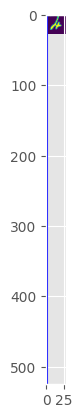

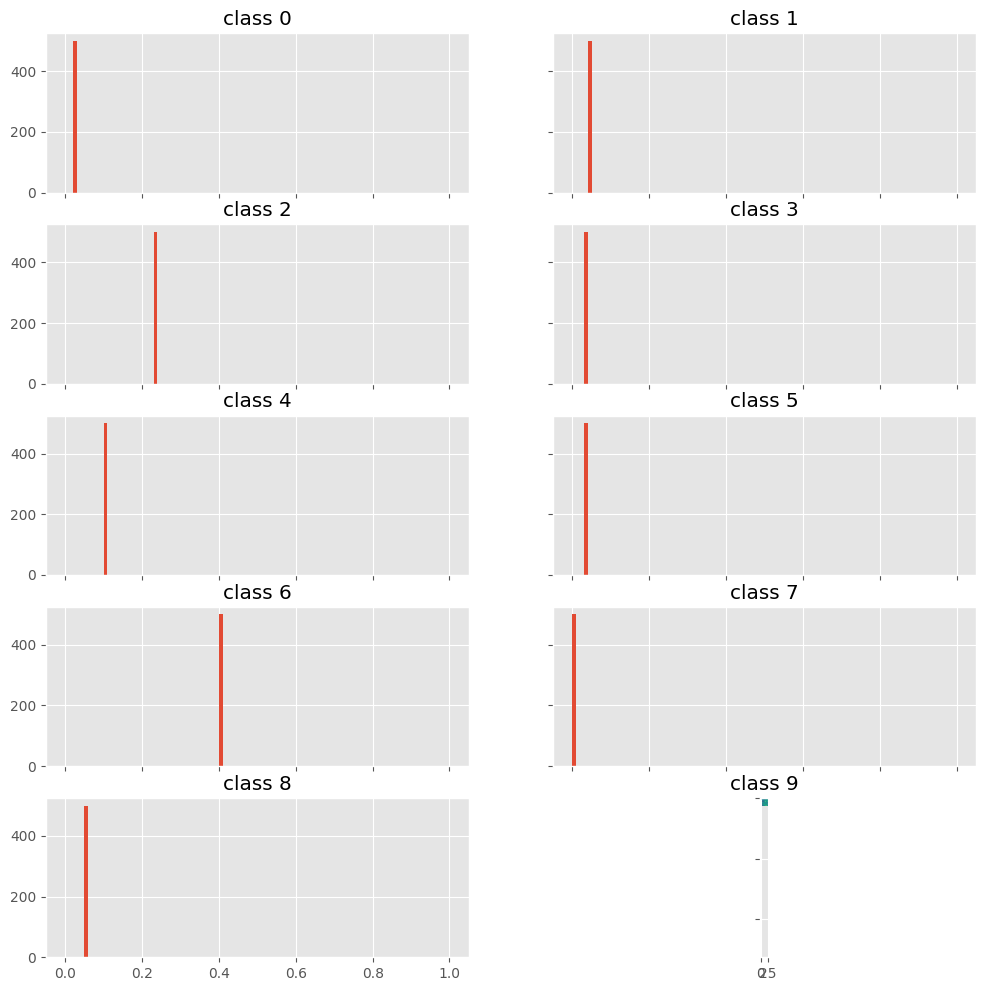

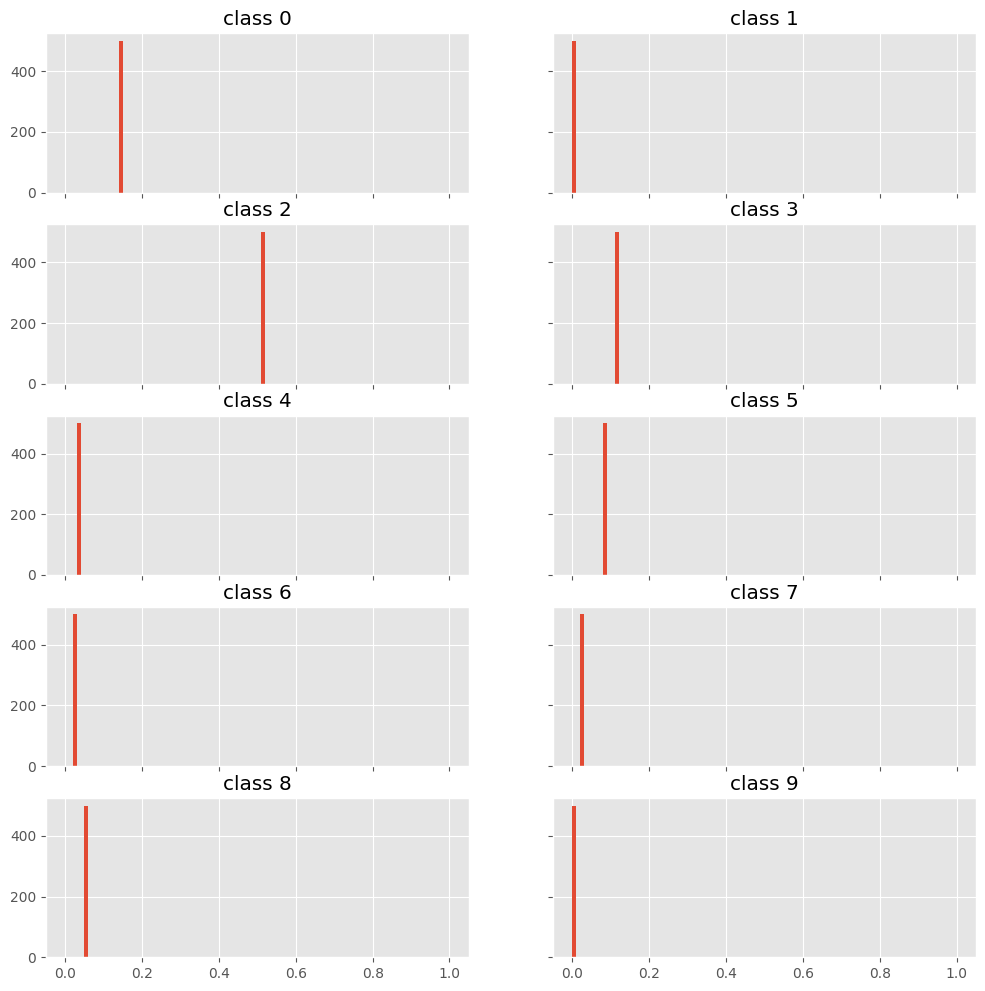

In [20]:
import tqdm
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten, SpatialDropout2D, SpatialDropout1D, AlphaDropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
plt.style.use("ggplot")
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


def get_dropout(input_tensor, p=0.5, mc=False):
    if mc:
        return Dropout(p)(input_tensor, training=True)
    else:
        return Dropout(p)(input_tensor)


def get_model(mc=False, act="relu"):
    inp = Input(input_shape)
    x = Conv2D(32, kernel_size=(3, 3), activation=act)(inp)
    x = Conv2D(64, kernel_size=(3, 3), activation=act)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = get_dropout(x, p=0.25, mc=mc)
    x = Flatten()(x)
    x = Dense(128, activation=act)(x)
    x = get_dropout(x, p=0.5, mc=mc)
    out = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inp, outputs=out)

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model


model = get_model(mc=False, act="relu")
mc_model = get_model(mc=True, act="relu")
h = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              verbose=1,
              validation_data=(x_test, y_test))
# score of the normal model
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
h_mc = mc_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

mc_predictions = []
for i in tqdm.tqdm(range(500)):
    y_p = mc_model.predict(x_test, batch_size=1000)
    mc_predictions.append(y_p)
# score of the mc model
accs = []
for y_p in mc_predictions:
    acc = accuracy_score(y_test.argmax(axis=1), y_p.argmax(axis=1))
    accs.append(acc)
print("MC accuracy: {:.1%}".format(sum(accs)/len(accs)))
mc_ensemble_pred = np.array(mc_predictions).mean(axis=0).argmax(axis=1)
ensemble_acc = accuracy_score(y_test.argmax(axis=1), mc_ensemble_pred)
print("MC-ensemble accuracy: {:.1%}".format(ensemble_acc))
plt.hist(accs)
plt.axvline(x=ensemble_acc, color="b")
idx = 247
plt.imshow(x_test[idx][:, :, 0])
p0 = np.array([p[idx] for p in mc_predictions])
print("posterior mean: {}".format(p0.mean(axis=0).argmax()))
print("true label: {}".format(y_test[idx].argmax()))
print()
# probability + variance
for i, (prob, var) in enumerate(zip(p0.mean(axis=0), p0.std(axis=0))):
    print("class: {}; proba: {:.1%}; var: {:.2%} ".format(i, prob, var))
x, y = list(range(len(p0.mean(axis=0)))), p0.mean(axis=0)
plt.plot(x, y)
fig, axes = plt.subplots(5, 2, figsize=(12, 12))

for i, ax in enumerate(fig.get_axes()):
    ax.hist(p0[:, i], bins=100, range=(0, 1))
    ax.set_title(f"class {i}")
    ax.label_outer()
max_means = []
preds = []
for idx in range(len(mc_predictions)):
    px = np.array([p[idx] for p in mc_predictions])
    preds.append(px.mean(axis=0).argmax())
    max_means.append(px.mean(axis=0).max())
(np.array(max_means)).argsort()[:10]
plt.imshow(x_test[247][:, :, 0])
max_vars = []
for idx in range(len(mc_predictions)):
    px = np.array([p[idx] for p in mc_predictions])
    max_vars.append(px.std(axis=0)[px.mean(axis=0).argmax()])
(-np.array(max_vars)).argsort()[:10]
plt.imshow(x_test[259][:, :, 0])
random_img = np.random.random(input_shape)
plt.imshow(random_img[:,:,0])
random_predictions = []
for i in tqdm.tqdm(range(500)):
    y_p = mc_model.predict(np.array([random_img]))
    random_predictions.append(y_p)
p0 = np.array([p[0] for p in random_predictions])
print("posterior mean: {}".format(p0.mean(axis=0).argmax()))
print()
# probability + variance
for i, (prob, var) in enumerate(zip(p0.mean(axis=0), p0.std(axis=0))):
    print("class: {}; proba: {:.1%}; var: {:.2%} ".format(i, prob, var))
x, y = list(range(len(p0.mean(axis=0)))), p0.mean(axis=0)
plt.plot(x, y)
fig, axes = plt.subplots(5, 2, figsize=(12,12))

for i, ax in enumerate(fig.get_axes()):
    ax.hist(p0[:,i], bins=100, range=(0,1));
    ax.set_title(f"class {i}")
    ax.label_outer()

In [21]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

iris_data = load_iris()  # load the iris dataset
if True:
    print('Example data: ')
    print(iris_data.data[:5])
    print('Example labels: ')
    print(iris_data.target[:5])
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1)  # Convert data to a single column
# One Hot encode the class labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y_)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)
results = model.evaluate(test_x, test_y)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]


C:\Users\In-Ho Lee\anaconda3\envs\testAI\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                          │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
24/24 - 1s - 33ms/step - accuracy: 0.3333 - loss: 2.3546
Epoch 2/200
24/24 - 0s - 2ms/step - accuracy: 0.3333 - loss: 1.6074
Epoch 3/200
24/24 - 0s - 2ms/step - accuracy: 0.3333 - loss: 1.1993
Epoch 4/200
24/24 - 0s - 2ms/step - accuracy: 0.2833 - loss: 1.0586
Epoch 5/200
24/24 - 0s - 2ms/step - accuracy: 0.1750 - loss: 1.0250
Epoch 6/200
24/24 - 0s - 2ms/step - accuracy: 0.0167 - loss: 0.9838
Epoch 7/200
24/24 - 0s - 2ms/step - accuracy: 0.1500 - loss: 0.9557
Epoch 8/200
24/24 - 0s - 2ms/step - accuracy: 0.2417 - loss: 0.9258
Epoch 9/200
24/24 - 0s - 2ms/step - accuracy: 0.4083 - loss: 0.8956
Epoch 10/200
24/24 - 0s - 2ms/step - accuracy: 0.6417 - loss: 0.8657
Epoch 11/200
24/24 - 0s - 2ms/step - accuracy: 0.6583 - loss: 0.8421
Epoch 12/200
24/24 - 0s - 2ms/step - accuracy: 0.6000 - loss: 0.8264
Epoch 13/200
24/24 - 0s - 2ms/step - accuracy: 0.6667 - loss: 0.8034
Epoch 14/200
24/24 - 0s - 2ms/step - accuracy: 0.6750 - loss: 0.7822
Epoch 15/200
24/24 - 0s - 2ms/step - 

In [22]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, validation_split=0.1)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7738 - loss: 0.7434 - val_accuracy: 0.9785 - val_loss: 0.0796
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9627 - loss: 0.1185 - val_accuracy: 0.9850 - val_loss: 0.0536
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9730 - loss: 0.0834 - val_accuracy: 0.9877 - val_loss: 0.0448
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9781 - loss: 0.0717 - val_accuracy: 0.9895 - val_loss: 0.0400
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9808 - loss: 0.0588 - val_accuracy: 0.9898 - val_loss: 0.0370
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9828 - loss: 0.0560 - val_accuracy: 0.9898 - val_loss: 0.0364
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9852 - loss: 0.0486 - val_accuracy: 0.9908 - val_loss: 0.0335
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9850 - loss: 0.0462 - val_accu

In [23]:
import numpy as np
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense


def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs,
              kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
    model.compile(loss='mae', optimizer='adam')
    return model


if True:
    X, y = make_regression(n_samples=1000, n_features=10,
                           n_informative=5, n_targets=3, random_state=17)
n_inputs, n_outputs = X.shape[1], y.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X, y, verbose=1, epochs=100)
# make a prediction for new data
row = [-0.99859353, 2.19284309, -0.42632569, -0.21043258, -1.13655612, 
       -0.55671602, -0.63169045, -0.87625098, -0.99445578, -0.3677487]
newX = np.asarray([row])
yhat = model.predict(newX)
print('Predicted: %s' % yhat[0])

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 86.3103   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 90.3140  
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 89.7351
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87.5841 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 86.0701
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 87.6935
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 84.0592
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 84.3946
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 78.7544 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 70.7110
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 65.6876
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 58.2689
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.5505 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 48.2687
Epoch 15/100
32/32 ━━━━━━━━━━━━

(2000, 2)
(2000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


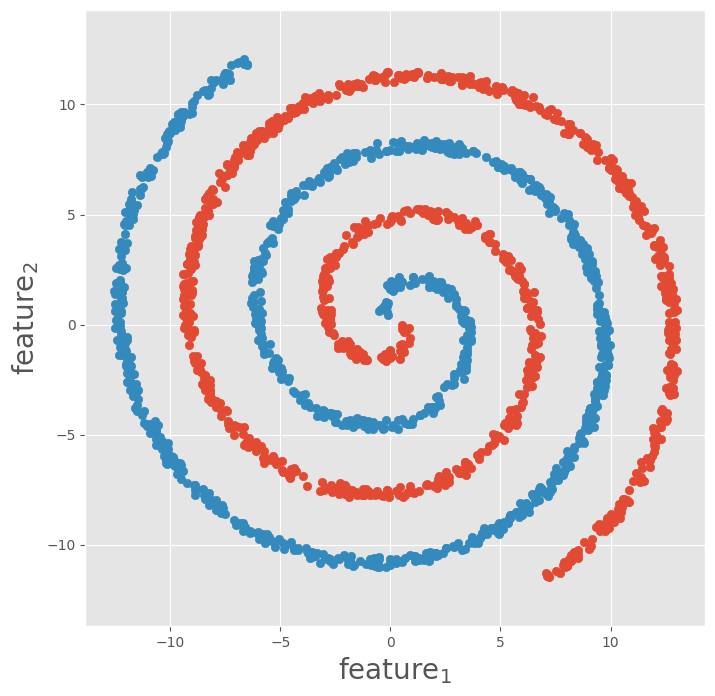

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 12)                  │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
Prediction values shape: (400, 1)
0.9058050012588501
Evaluating on training set
loss=0.0000, accuracy: 100.0000%
Evaluating on test set
loss=0.0000, accuracy: 100.0000%


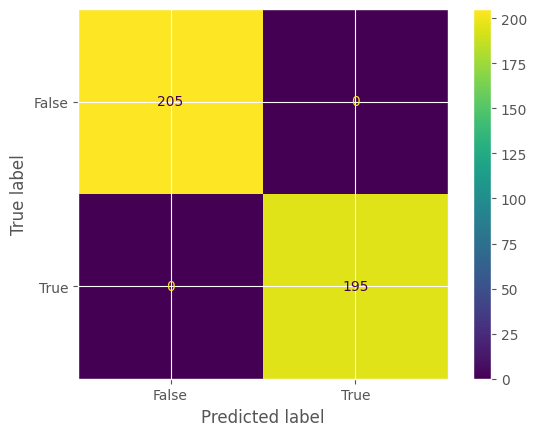

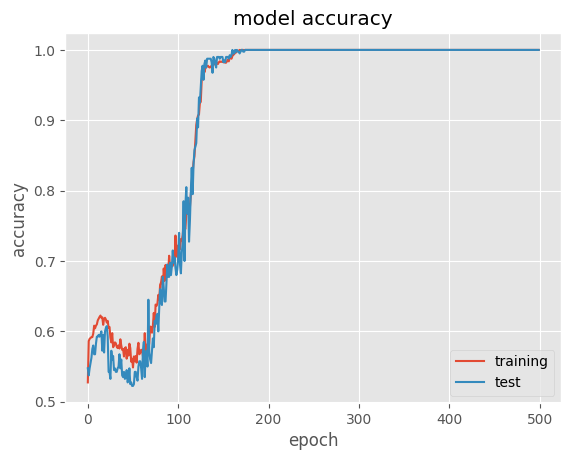

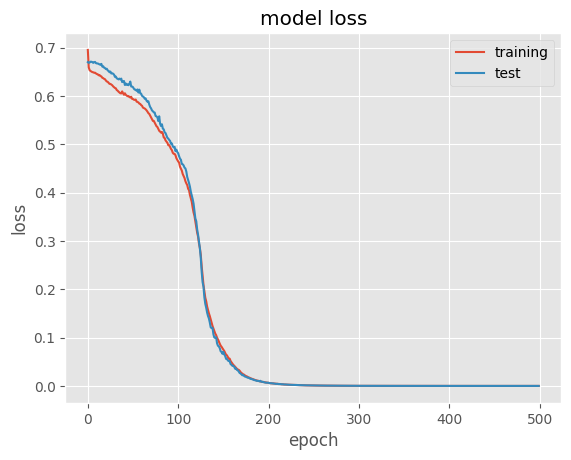

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3s 574us/step


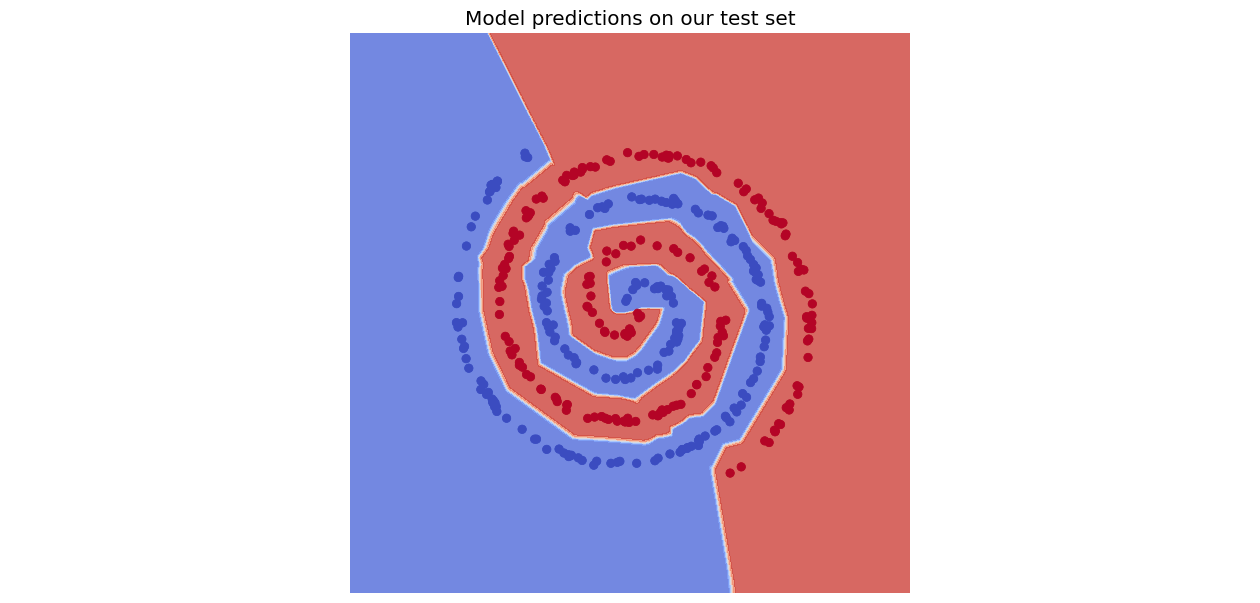

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


np.random.seed(17)

def spiral_xy(i, spiral_num):
    """
    Create the data for a spiral.

    Arguments:
        i runs from 0 to 96
        spiral_num is 1 or -1
    """
    φ = i/16 * math.pi
    r = 6.5 * ((104 - i)/104)
    x = (r * math.cos(φ) * spiral_num)/13 + 0.5
    y = (r * math.sin(φ) * spiral_num)/13 + 0.5
    return (x, y)

def spiral(spiral_num):
    return [spiral_xy(i, spiral_num) for i in range(97)]

def spirals(points, noise=.5):
    n = np.sqrt(np.random.rand(points, 1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(points, 1) * noise
    d1y = np.sin(n)*n + np.random.rand(points, 1) * noise
    d2x = np.cos(n)*n + np.random.rand(points, 1) * noise
    d2y = -np.sin(n)*n + np.random.rand(points, 1) * noise
    return (np.vstack((np.hstack((d1x, d1y)), np.hstack((d2x, d2y)))),
            np.hstack((np.zeros(points), np.ones(points))))


kase= -5
kase= -20
if kase == -5 :
    X, y = make_moons(n_samples=1000, noise=0.1, random_state=17)
if kase == -20:
    X, y = spirals(1000)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

print(y[0:10])
print(y[-10:])
if True:
    alist = []
    blist = []
    clist = []
    dlist = []
    ay = []
    cy = []
    for i in range(len(y)):
        if y[i] > 0.5:
            alist.append(X[i, 0])
            blist.append(X[i, 1])
            ay.append(y[i])
        else:
            clist.append(X[i, 0])
            dlist.append(X[i, 1])
            cy.append(y[i])
    alist = np.array(alist)
    blist = np.array(blist)
    clist = np.array(clist)
    dlist = np.array(dlist)
    ay = np.array(ay)
    cy = np.array(cy)
    plt.figure(figsize=(8, 8))
    plt.scatter(alist[:], blist[:])
    plt.scatter(clist[:], dlist[:])
    plt.xlabel(r'feature$_1$', fontsize=20)
    plt.ylabel(r'feature$_2$', fontsize=20)
    plt.axis('equal')
    plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17)


if True:
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(12, input_dim=2, activation='relu'))
    model.add(tf.keras.layers.Dense(12, activation='relu'))
    model.add(tf.keras.layers.Dense(12, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    model.summary()
    results = model.fit(X_train, y_train, epochs=500,
                        validation_data=(X_test, y_test), verbose=0)
#   prediction_values = model.predict_classes(X_test)
    y_prob = model.predict(X_test, verbose=0)
#    prediction_values = y_prob.argmax(axis=-1)
    y_prob= (y_prob > 0.5).astype('int32')
    print(y_test[:10])
    print(y_prob[:10])
#        if y_prob.shape[-1] > 1:
#            return proba.argmax(axis=-1)
#        else:
#            return (y_prob > 0.5).astype('int32')
    

print("Prediction values shape:", y_prob.shape)
print(np.mean(results.history["val_accuracy"]))
print("Evaluating on training set")
(loss, accuracy) = model.evaluate(X_train, y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

print("Evaluating on test set")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

if True:
    from sklearn import metrics
    y_prob = model.predict(X_test, verbose=0)
#    y_pred = y_prob.argmax(axis=-1)
    y_prob= (y_prob > 0.5).astype('int32')
    confusion_matrix = metrics.confusion_matrix(y_test, y_prob)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'test'], loc='upper right')
plt.show()

plt.figure(figsize=(16, 16))
plt.subplot(212)
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_prob[:], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal')
xx = np.linspace(kase, -kase, 400)
yy = np.linspace(kase, -kase, 400)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([kase, -kase])
axes.set_ylim([kase, -kase])
plt.grid('off')

plt.axis('off')
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_prob[:], cmap=cm.coolwarm)
plt.title('Model predictions on our test set')
plt.show()

!pip install keras

!pip install scikeras

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
import keras.backend as K
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
#from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_classification, make_moons, make_circles
from matplotlib.colors import ListedColormap
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [19]:
def make_multiclass(N=2000, D=2, K=3):
    """
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0, 1, N)
        # theta
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.11
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    return X, y


def plot_confusion_matrix(model, X, y):
    #    y_pred = model.predict_classes(X, verbose=0)
    y_pred = model.predict(X, verbose=0)
    y_pred.ndim
    if y_pred.ndim == 1:
        y_pred = (y_pred > 0.5).astype('int32')
    else:
        y_pred = y_pred.argmax(axis=-1)

    plt.figure(figsize=(6, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)),
                annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)


def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(6, 4))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))


def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 601),
                         np.linspace(y_min, y_max, 601))
#    cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    cmap = ListedColormap(['r', 'g', 'b'])

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    if Z.ndim == 1:
        Z = (Z > 0.5).astype('int32')
    else:
        Z = Z.argmax(axis=-1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

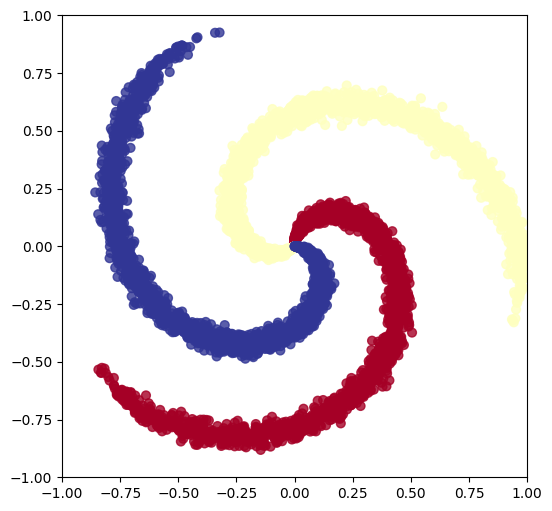

In [20]:
X, y = make_multiclass(K=3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17)

<Figure size 600x400 with 0 Axes>

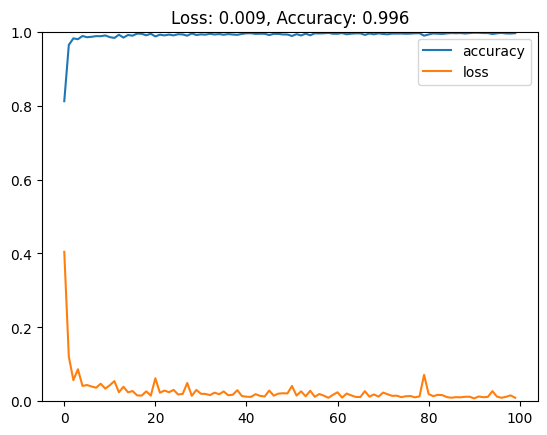

In [21]:
model = Sequential()
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))
model.compile(Adam(learning_rate=0.005),
              loss='categorical_crossentropy', metrics=['accuracy'])
y_cat = to_categorical(y_train)
history = model.fit(X_train, y_cat, verbose=0, epochs=100)
plot_loss_accuracy(history)

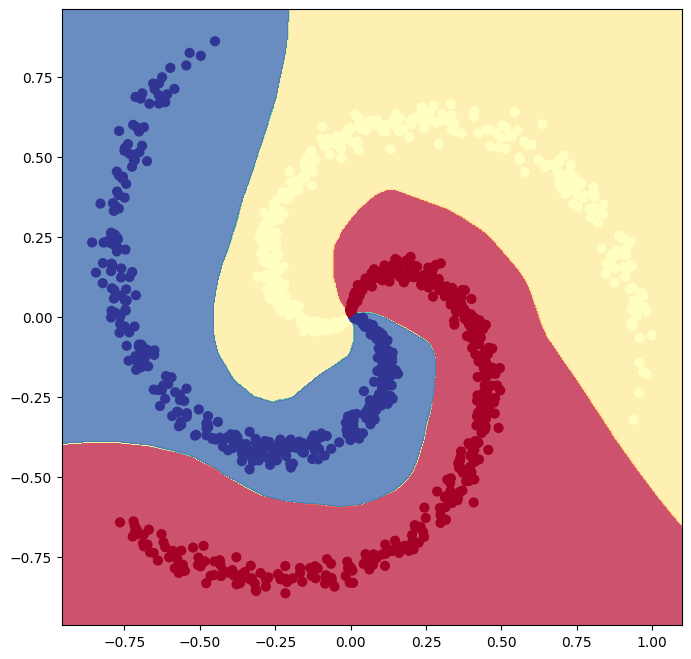

In [22]:
plot_multiclass_decision_boundary(model, X_test, y_test)

2
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       409
         1.0       1.00      1.00      1.00       384
         2.0       1.00      1.00      1.00       407

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



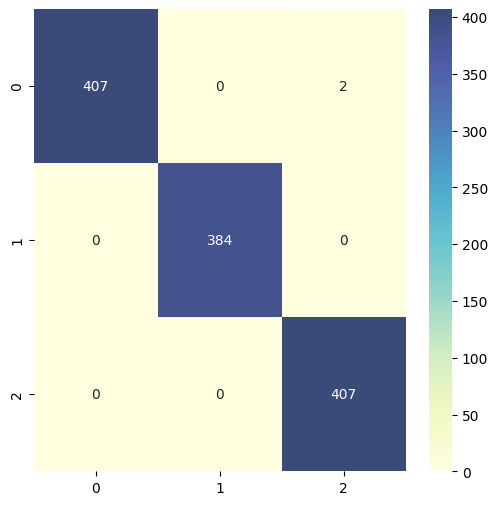

In [23]:
y_pred = model.predict(X_test, verbose=0)
print(y_pred.ndim)
if y_pred.ndim == 1:
    y_pred = (y_pred > 0.5).astype('int32')
else:
    y_pred = y_pred.argmax(axis=-1)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)

In [24]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.preprocessing import sequence
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, validation_data=(
    X_test, y_test), epochs=10, batch_size=128, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Accuracy: 87.41%


(60000, 784)
(10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3861 - val_loss: 0.1895
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1796 - val_loss: 0.1527
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1486 - val_loss: 0.1346
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1325 - val_loss: 0.1220
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1211 - val_loss: 0.1133
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1123 - val_loss: 0.1068
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1067 - val_loss: 0.1024
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1025 - val_loss: 0.0992
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0998 - val_loss: 0.0970
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0977 - val_loss: 0.0955
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0965 - val_loss: 0.0945
Epoch 12/50
235/235 ━━━━━━

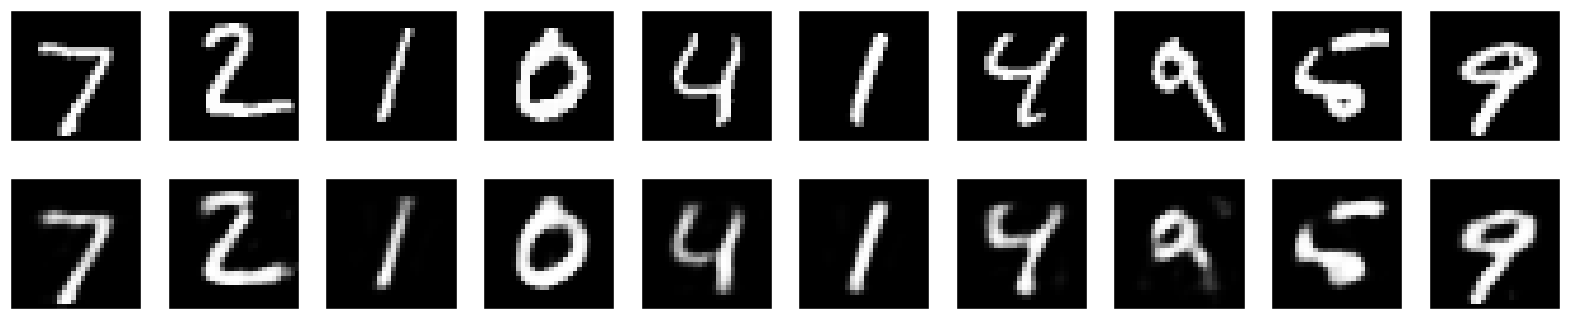

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
#     this is the size of our encoded representations
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats, 28*28/32 = 24.5
encoding_dim = 32

#     this is our input placeholder
input_img = Input(shape=(784,))
#     "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#      "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

#      this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
#      this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#     create a placeholder for an encoded 32D input
encoded_input = Input(shape=(encoding_dim,))
#     retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
#     create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,
                shuffle=True, validation_data=(x_test, x_test))
#     encode and decode some digits
#     note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

#     use matplotlib
n = 10                     # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    #      display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #      display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)   │ (None, 28, 28, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 14, 14, 32)        │             320 │ input_layer_13[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 7, 7, 64)          │          18,496 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_4 (Flatten)           │ (None, 3136)              │               0 │ conv2d_7[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_31 (Dense)              │ (None, 16)                │          50,192 │ flatten_4[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ z_mean (Dense)                │ (None, 2)                 │              34 │ dense_31[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ z_log_var (Dense)             │ (None, 2)                 │              34 │ dense_31[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sampling (Sampling)           │ (None, 2)                 │               0 │ z_mean[0][0],              │
│                               │                           │                 │ z_log_var[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 3136)                │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - kl_loss: 1.7354 - loss: 258.5909 - reconstruction_loss: 256.8555
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - kl_loss: 3.1393 - loss: 192.9855 - reconstruction_loss: 189.8462
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - kl_loss: 3.0631 - loss: 187.9195 - reconstruction_loss: 184.8565
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - kl_loss: 3.2323 - loss: 184.1259 - reconstruction_loss: 180.8936
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - kl_loss: 3.2854 - loss: 180.8545 - reconstruction_loss: 177.5690
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - kl_loss: 3.4523 - loss: 178.0103 - reconstruction_loss: 174.5580
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - kl_loss: 3.5957 - loss: 175.7838 - reconstruction_loss: 172.1882
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - kl_loss: 3.6898 - loss: 174.7156 - reconstruction_loss: 171.0258
Epoch 9/30
547/547 ━━━━━━━━━━━━━

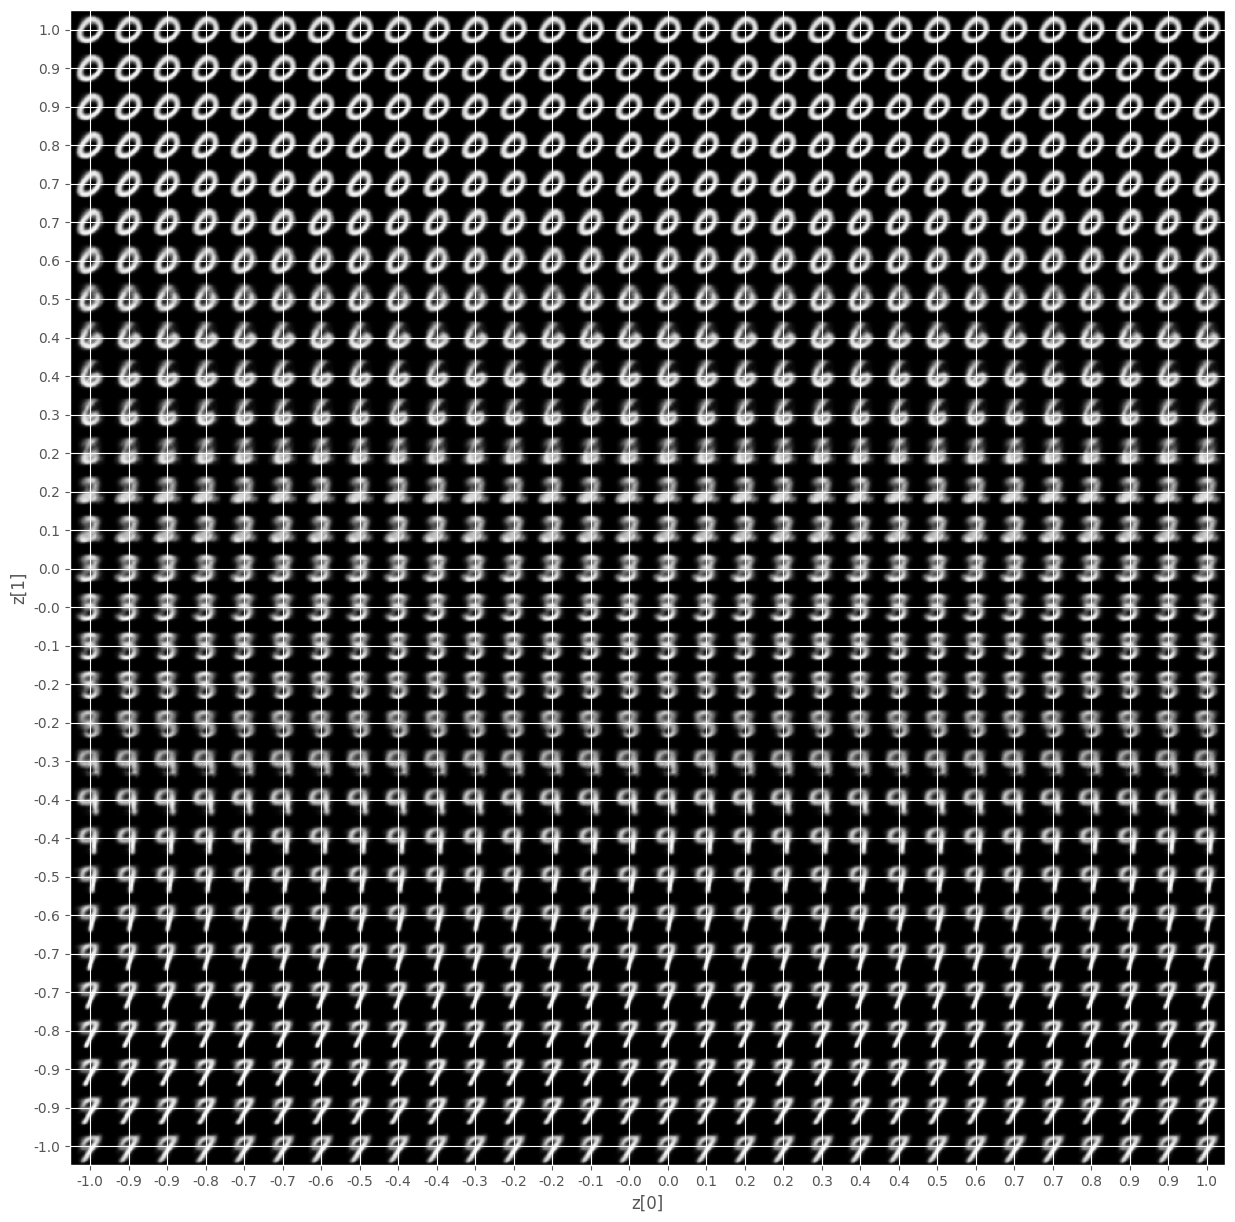

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


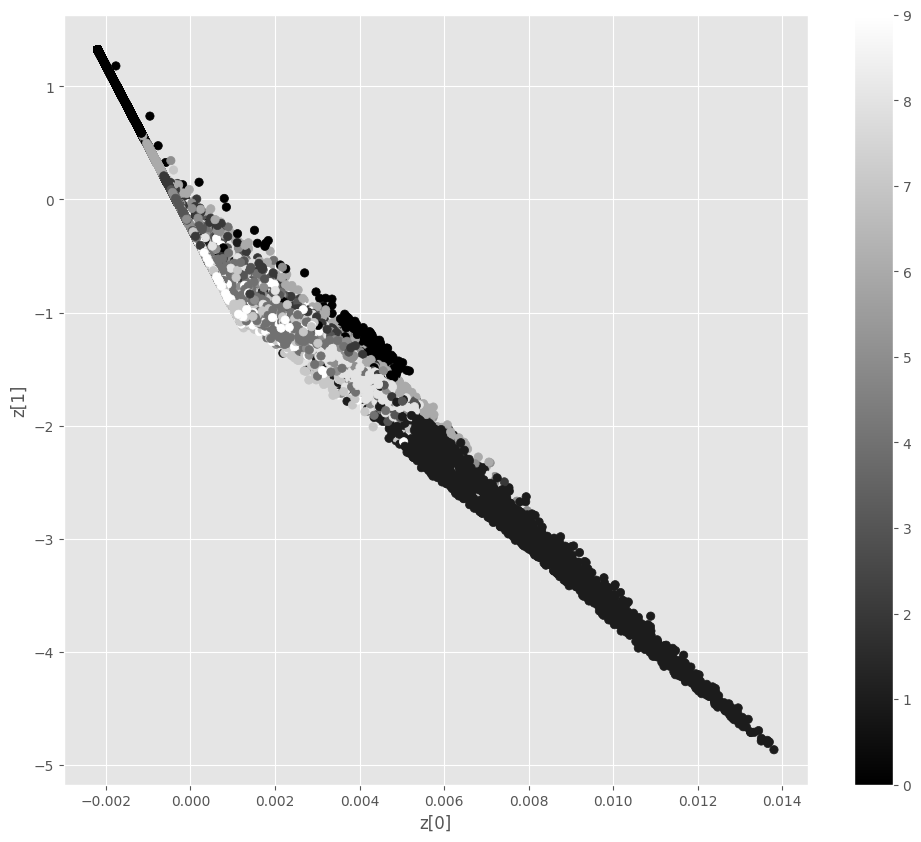

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2,
                  padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu",
                           strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu",
                           strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(
    1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var -
                              tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size: (i + 1) * digit_size,
                j * digit_size: (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)


def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

The number of records in the training dataset is 80000
The number of records in the test dataset is 20000
The training dataset has 79200     records for the majority class and 800     records for the minority class.
Epoch 1/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.5682 - val_loss: 2.5095
Epoch 2/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.5024 - val_loss: 2.4986
Epoch 3/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4918 - val_loss: 2.4880
Epoch 4/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4811 - val_loss: 2.4805
Epoch 5/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4752 - val_loss: 2.4758
Epoch 6/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4705 - val_loss: 2.4742
Epoch 7/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.4669 - val_loss: 2.4723
Epoch 8/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4695 - val_loss: 2.4706
Epoch 9/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.4669 - val_loss:

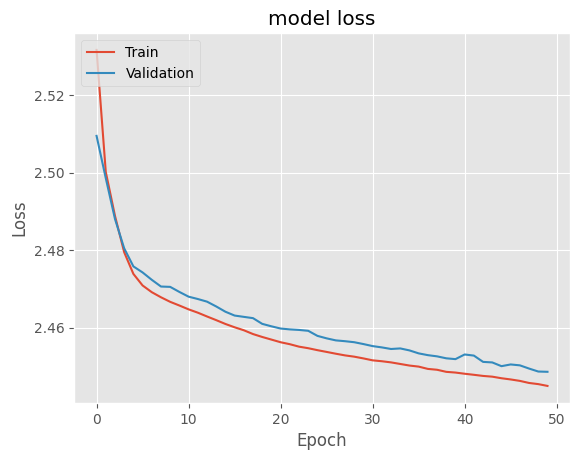

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step
The prediction loss threshold for 2% of outliers is    3.45
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19803
           1       0.01      0.01      0.01       197

    accuracy                           0.97     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.98      0.97      0.98     20000



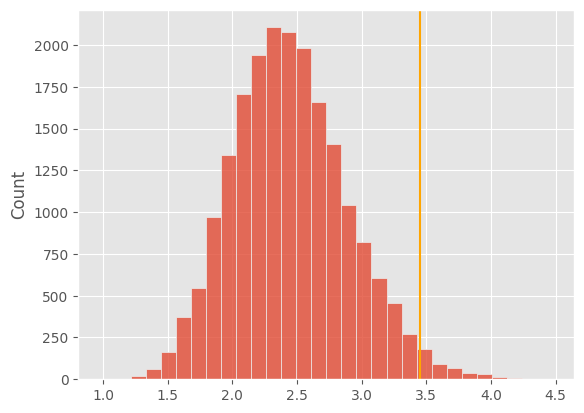

In [28]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X, y = make_classification(n_samples=100000, n_features=32, n_informative=32,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.995, 0.005],
                           class_sep=0.5, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} \
    records for the majority class and {sorted(Counter(y_train).items())[1][1]} \
    records for the minority class.")
X_train_normal = X_train[np.where(y_train == 0)]
input = tf.keras.layers.Input(shape=(32,))
encoder = tf.keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu')])(input)
decoder = tf.keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(32, activation="sigmoid")])(encoder)
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(X_train_normal, X_train_normal,
                          epochs=50,
                          batch_size=64,
                          validation_data=(X_test, X_test),
                          shuffle=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# ae anomaly detection threshold
# predict anomalies/outliers in the training dataset
prediction = autoencoder.predict(X_test)
# the mae between actual and reconstruction/prediction
prediction_loss = tf.keras.losses.mae(prediction, X_test)
# prediction loss threshold for 2% of outliers
loss_threshold = np.percentile(prediction_loss, 98)
print(f'The prediction loss threshold for 2% of outliers is\
    {loss_threshold:.2f}')
# visualize the threshold
sns.histplot(prediction_loss, bins=30, alpha=0.8)
plt.axvline(x=loss_threshold, color='orange')
threshold_prediction = [
    0 if i < loss_threshold else 1 for i in prediction_loss]
# prediction performance
print(classification_report(y_test, threshold_prediction))

In [29]:
import tensorflow as tf
from keras.datasets import mnist
#from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import ELU, PReLU, LeakyReLU
#from keras.optimizers import Adam, RMSprop
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook
#from tqdm.autonotebook import tqdm

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
z_dim = 100
#adam = Adam(learning_rate=0.0002, beta_1=0.5)
#adam = tf.keras.optimizers.legacy.SGD(learning_rate=0.0002)

g = Sequential()
g.add(Dense(256, input_dim=z_dim, activation=LeakyReLU(negative_slope=0.2)))
g.add(Dense(512, activation=LeakyReLU(negative_slope=0.2)))
g.add(Dense(1024, activation=LeakyReLU(negative_slope=0.2)))
g.add(Dense(784, activation='sigmoid'))  # Values between 0 and 1
g.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

d = Sequential()
d.add(Dense(1024, input_dim=784, activation=LeakyReLU(negative_slope=0.2)))
d.add(Dropout(0.3))
d.add(Dense(512, activation=LeakyReLU(negative_slope=0.2)))
d.add(Dropout(0.3))
d.add(Dense(256, activation=LeakyReLU(negative_slope=0.2)))
d.add(Dropout(0.3))
d.add(Dense(1, activation='sigmoid'))  # Values between 0 and 1
d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

d.trainable = False
inputs = Input(shape=(z_dim, ))
hidden = g(inputs)
output = d(hidden)
gan = Model(inputs, output)
gan.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


def plot_loss(losses):
    if True:
        d_loss = [v[0] for v in losses["D"]]
        g_loss = [v[0] for v in losses["G"]]
    if False:
        d_acc = [v[1] for v in losses["D"]]
        g_acc = [v[1] for v in losses["G"]]

    plt.figure(figsize=(10, 8))
    if True:
        plt.plot(d_loss, label="Discriminator loss")
        plt.plot(g_loss, label="Generator loss")
    if False:
        plt.plot(d_acc, label="Discriminator accuracy")
        plt.plot(g_acc, label="Generator accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def plot_generated(n_ex=10, dim=(1, 10), figsize=(12, 2)):
    noise = np.random.normal(0, 1, size=(n_ex, z_dim))
    generated_images = g.predict(noise)
    generated_images = generated_images.reshape(n_ex, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


losses = {"D": [], "G": []}


def train(epochs=1, plt_frq=1, BATCH_SIZE=128):
    batchCount = int(X_train.shape[0] / BATCH_SIZE)
    print('Epochs:', epochs)
    print('Batch size:', BATCH_SIZE)
    print('Batches per epoch:', batchCount)

#    for e in tqdm(range(1, epochs+1)):
    for e in range(1, epochs+1):    
        if e == 1 or e % plt_frq == 0:
            print('-'*15, 'Epoch %d' % e, '-'*15)
        # tqdm_notebook(range(batchCount), leave=False):
        for _ in range(batchCount):
            # Create a batch by drawing random index numbers from the training set
            image_batch = X_train[np.random.randint(
                0, X_train.shape[0], size=BATCH_SIZE)]
            # Create noise vectors for the generator
            noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))

            # Generate the images from the noise
            generated_images = g.predict(noise)
            X = np.concatenate((image_batch, generated_images))
            # Create labels
            y = np.zeros(2*BATCH_SIZE)
            y[:BATCH_SIZE] = 0.9  # One-sided label smoothing

            # Train discriminator on generated images
            d.trainable = True
            d_loss = d.train_on_batch(X, y)

            # Train generator
            noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            y2 = np.ones(BATCH_SIZE)
            d.trainable = False
            g_loss = gan.train_on_batch(noise, y2)

        # Only store losses from final batch of epoch
        losses["D"].append(d_loss)
        losses["G"].append(g_loss)

        # Update the plots
        if e == 1 or e % plt_frq == 0:
            plot_generated()
    plot_loss(losses)


train(epochs=200, plt_frq=20, BATCH_SIZE=128)

Epochs: 200
Batch size: 128
Batches per epoch: 468
--------------- Epoch 1 ---------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ValueError: Cannot get result() since the metric has not yet been built.

In [30]:
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Dropout

X, y = make_classification(
    n_samples=1000, n_features=4, n_classes=2, random_state=1)

n_features = X.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu',
          kernel_initializer='he_normal', input_shape=(n_features,)))
for _ in range(3):
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

model.fit(X, y, epochs=100, batch_size=32, verbose=1, validation_split=0.3)

#model.save('model.h5')
tf.keras.models.save_model(model, "C:/Users/In-Ho Lee/testAI/model.h5")

from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model

X, y = make_classification(
    n_samples=1000, n_features=4, n_classes=2, random_state=2)

#model = load_model('model.h5')
model = tf.keras.models.load_model("C:/Users/In-Ho Lee/testAI/model.h5")
model.compile(optimizer=sgd, loss='binary_crossentropy')

row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat=model.predict(X)
print(yhat[0])
#yhat = model.predict([row])
#print('Predicted: %.3f' % yhat[0])

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7102 - val_loss: 0.7109
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7063 - val_loss: 0.7028
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7002 - val_loss: 0.6981
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6954 - val_loss: 0.6965
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6934 - val_loss: 0.6946
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6930 - val_loss: 0.6936
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6891 - val_loss: 0.6927
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6894 - val_loss: 0.6918
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6881 - val_loss: 0.6909
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6829 - val_loss: 0.6902
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6844 - val_loss: 0.6891
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[0.35809267]


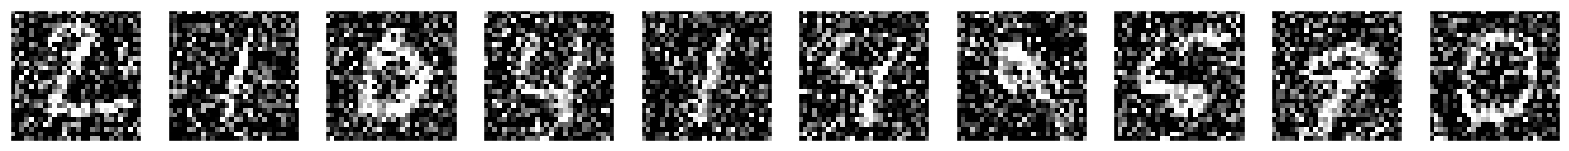

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3450 - val_loss: 0.2132
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2046 - val_loss: 0.1744
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1718 - val_loss: 0.1637
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1624 - val_loss: 0.1555
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1546 - val_loss: 0.1492
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1483 - val_loss: 0.1449
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1443 - val_loss: 0.1407
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1402 - val_loss: 0.1378
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1372 - val_loss: 0.1362
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1356 - val_loss: 0.1342
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1342 - val_loss: 0.1325
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

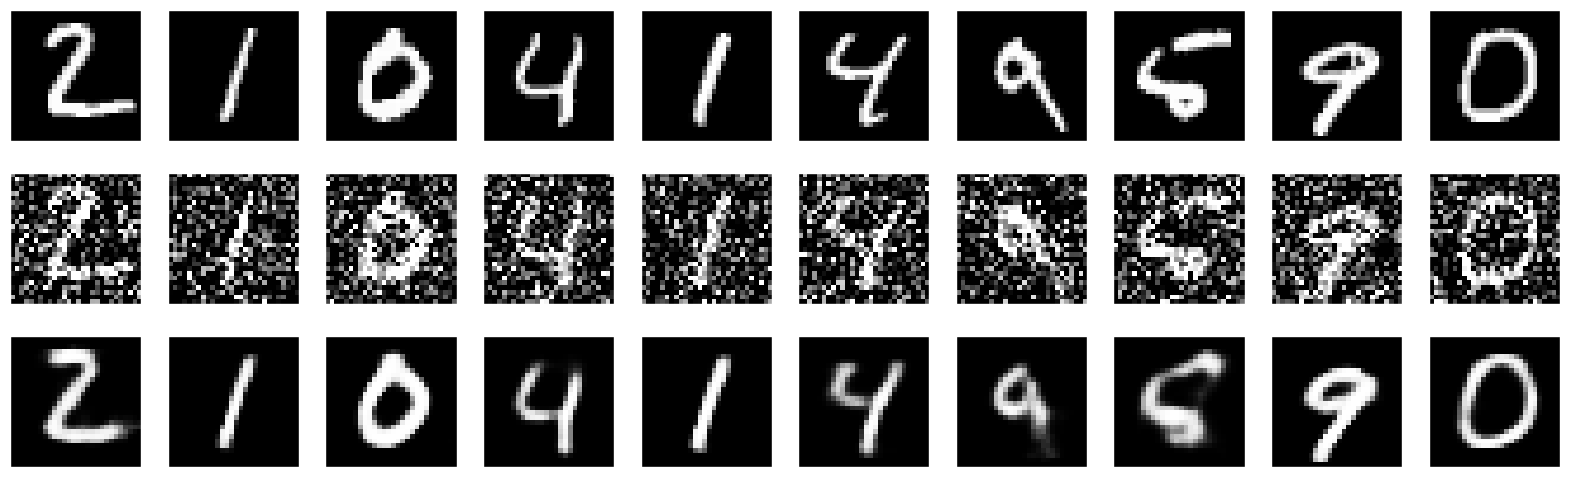

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x_train_noisy, x_train, epochs=100, batch_size=256,
          shuffle=True, validation_data=(x_test_noisy, x_test))
decoded_imgs = model.predict(x_test)
n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n+1):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display noisy
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

(60000, 28, 28)
(10000, 28, 28)
Epoch 1/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 0.3352 - val_loss: 0.1316
Epoch 2/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.1818 - val_loss: 0.1138
Epoch 3/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.1715 - val_loss: 0.1087
Epoch 4/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.1658 - val_loss: 0.1086
Epoch 5/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.1628 - val_loss: 0.1040
Epoch 6/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.1602 - val_loss: 0.1016
Epoch 7/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - loss: 0.1586 - val_loss: 0.1001
Epoch 8/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - loss: 0.1570 - val_loss: 0.0984
Epoch 9/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.1556 - val_loss: 0.0997
Epoch 10/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.1550 - val_loss: 0.0972
Epoch 11/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.1541 - val_

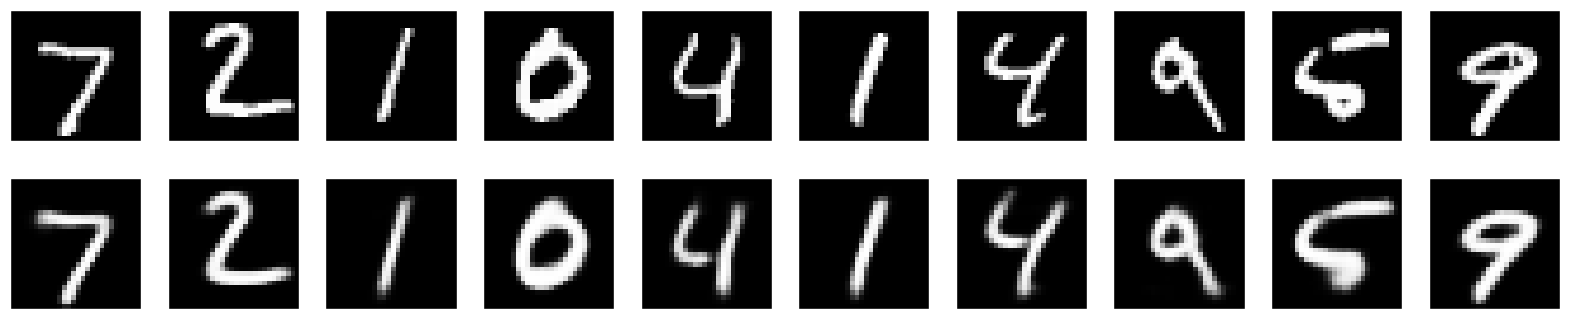

In [32]:
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.callbacks import TensorBoard
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
import numpy as np
from keras.datasets import mnist
(x_train, _), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
#     noising
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
#     adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
#     adapt this if using `channels_first` image data format
noise_factor = 0.9
x_train_noisy = x_train + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
#     make a model
#     adapt this if using `channels_first` image data format
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
#     at this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
#     this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
#     this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
#     compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#     train
history = autoencoder.fit(x_train_noisy, x_train, epochs=300, batch_size=256, shuffle=True, validation_data=(
    x_test, x_test))
#     test
#     encode and decode some digits
#     note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)
print(encoded_imgs.shape)
print('z: ' + str(encoded_imgs))
#     structure of model
plot_model(autoencoder, show_shapes=True, to_file='autoencoder.png')
#     visualize
n = 10
#     how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    #     display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#     display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

(60000, 28, 28)
(10000, 28, 28)
The maximum pixel value: 255
The minimum pixel value: 0
(60000, 28, 28, 1)
(10000, 28, 28, 1)
The maximum pixel value: 1.0
The minimum pixel value: 0.0


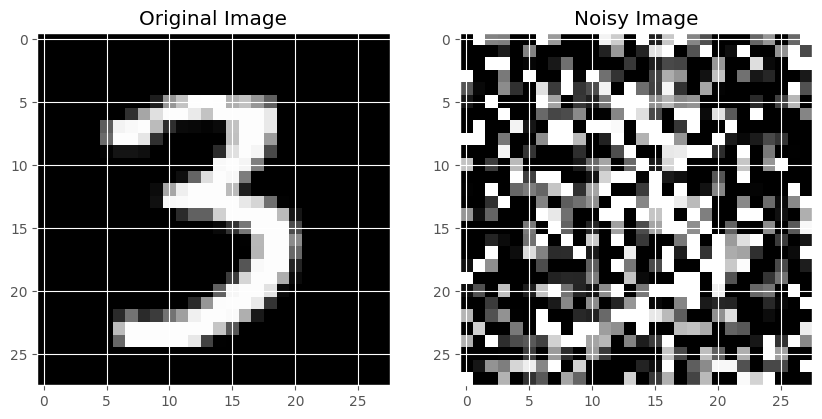

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
(X_train, _), (X_test, _) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(f"The maximum pixel value: {X_train[0].max()}")
print(f"The minimum pixel value: {X_train[0].min()}")
# print(X_train[0])
X_train = X_train/255.
X_test = X_test/255.

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(X_train.shape)
print(X_test.shape)
print(f"The maximum pixel value: {X_train[0].max()}")
print(f"The minimum pixel value: {X_train[0].min()}")
noise_factor = .8
X_train_noisy = X_train + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_train_noisy = np.clip(X_train_noisy, 0., 1.)
n = 10000

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].imshow(X_train[n], cmap='gray')
ax[1].imshow(x_train_noisy[n], cmap='gray')
ax[0].set_title("Original Image")
ax[1].set_title("Noisy Image")
plt.show()

# Define the input shape
input_shape = (28, 28, 1)

# Define the input tensor
inputs = Input(input_shape)

# Define the encoder part of the network
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

# Define the decoder part of the network
up4 = UpSampling2D((2, 2))(conv3)
up4 = Conv2D(64, (2, 2), activation='relu', padding='same')(up4)
merge4 = concatenate([conv2, up4], axis=3)

conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge4)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

up5 = UpSampling2D((2, 2))(conv4)
up5 = Conv2D(32, (2, 2), activation='relu', padding='same')(up5)
merge5 = concatenate([conv1, up5], axis=3)

conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(merge5)
conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

# Define the output layer of the network
output = Conv2D(1, (1, 1), activation='sigmoid')(conv5)

# Define the model
model = Model(inputs=[inputs], outputs=[output])
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
# model.summary()
history = model.fit(X_train_noisy, X_train, epochs=100,
                    verbose=0, batch_size=128, shuffle=True)
noise_factor = .5
X_test_noisy_50 = X_test + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_test_noisy_50 = np.clip(X_test_noisy_50, 0., 1.)
denoised_image = model.predict(X_test_noisy_50)
model.evaluate(X_test_noisy_50, X_test)

for i in range(2):
    fig, ax = plt.subplots(1, 3, figsize=(10, 6))
    ax[0].imshow(X_test[i], cmap='gray')
    ax[1].imshow(X_test_noisy_50[i], cmap='gray')
    ax[2].imshow(denoised_image[i], cmap='gray')
    ax[0].set_title("Original Image")
    ax[1].set_title("Noised Image")
    ax[2].set_title("denoised Image")
    plt.show()
noise_factor = .65
X_test_noisy_65 = X_test + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_test_noisy_65 = np.clip(X_test_noisy_65, 0., 1.)
denoised_image = model.predict(X_test_noisy_65)
model.evaluate(X_test_noisy_65, X_test)

for i in range(2):
    fig, ax = plt.subplots(1, 3, figsize=(10, 6))
    ax[0].imshow(X_test[i], cmap='gray')
    ax[1].imshow(X_test_noisy_65[i], cmap='gray')
    ax[2].imshow(denoised_image[i], cmap='gray')
    ax[0].set_title("Original Image")
    ax[1].set_title("Noised Image")
    ax[2].set_title("denoised Image")
    plt.show()
noise_factor = .8
X_test_noisy_80 = X_test + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_test_noisy_80 = np.clip(X_test_noisy_80, 0., 1.)
denoised_image = model.predict(X_test_noisy_80)
model.evaluate(X_test_noisy_80, X_test)

for i in range(2):
    fig, ax = plt.subplots(1, 3, figsize=(10, 6))
    ax[0].imshow(X_test[i], cmap='gray')
    ax[1].imshow(X_test_noisy_80[i], cmap='gray')
    ax[2].imshow(denoised_image[i], cmap='gray')
    ax[0].set_title("Original Image")
    ax[1].set_title("Noised Image")
    ax[2].set_title("denoised Image")
    plt.show()

이공학적 설계를 위한 인공지능 최적화
(Artificial Intelligence and Optimization Techniques for Engineering Design)

Chapter 6

In [ ]:
def objective_ms(seq):
    ndim = len(seq)
    ndim = int(np.sqrt(ndim))
    m = np.zeros((ndim, ndim))
    k = 0
    for i in range(ndim):
        for j in range(ndim):
            m[i, j] = seq[k]
            k = k+1
    tmp = (ndim*ndim*ndim+ndim)/2.
    score = 0.
    tmq = 0.
    tmr = 0.
    for i in range(ndim):
        tmq = tmq+m[i, i]
        tmr = tmr+m[ndim-i-1, i]
    score = score+(tmq-tmp)**2
    score = score+(tmr-tmp)**2
    for i in range(ndim):
        score = score+(sum(m[i, :])-tmp)**2
        score = score+(sum(m[:, i])-tmp)**2
    return score


def objective_nq(seq):
    ndim = len(seq)
    score = (ndim*ndim-ndim)/2.
    for row in range(ndim):
        col = seq[row]
        for other_row in range(ndim):
            # queens cannot pair with itself
            if other_row == row:
                continue
            if seq[other_row] == col:
                continue
            if other_row + seq[other_row] == row + col:
                continue
            if other_row - seq[other_row] == row - col:
                continue
            # score++ if every pair of queens are non-attacking.
            score -= 0.5
    # divide by 2 as pairs of queens are commutative
    return score

In [ ]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]


kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(
    kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

noise_std = 0.75
y_train_noisy = y_train + \
    rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

gaussian_process = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)
gaussian_process.fit(X_train, y_train_noisy)
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on a noisy dataset")

In [ ]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gaussian Naive Bayes 분류 모델 생성 및 학습
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 결과 출력
y_pred = gnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

!pip install scikit-optimize

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skopt.plots import plot_gaussian_process

np.random.seed(237)
noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) + np.random.randn() * noise_level

# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx],
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.show()

from skopt import gp_minimize

res = gp_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=15,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=1234)   # the random seed

"x^*=%.4f, f(x^*)=%.4f" % (res.x[0], res.fun)

print(res)

from skopt.plots import plot_convergence
plot_convergence(res)

In [ ]:
import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 9, 12, 18, 25, 96, 48])
print(x)
print(y)
scipy.stats.pearsonr(x, y)[0]    # Pearson's r

scipy.stats.spearmanr(x, y)[0]   # Spearman's rho

scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import scipy
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]
#plt.style.use('seaborn-darkgrid')

if True:
    N = 2
    M = int(1e7)
    y = np.random.uniform(low=-0.5, high=0.5, size=(M, N))
    p = np.sum(np.sqrt(y[:, 0]**2 + y[:, 1]**2) < 0.5)/M
    print(p, 4*p)

N_MAX = 16
M = int(1e7)
dims = np.zeros(N_MAX, dtype=np.int32)
volume = np.zeros(N_MAX)
for N in range(1, N_MAX+1):
    y = np.random.uniform(low=-0.5, high=0.5, size=(M, N))
    # 거리 계산에 해당하는 부분
    dist = cdist(y, np.expand_dims(np.zeros(N), 0), metric='euclidean')
    p = np.sum(dist < 0.5)/M
    dims[N-1] = N
    volume[N-1] = p
df = pd.DataFrame(data={'dims': dims, 'volume': volume})
print(df)
plt.plot(df.dims, df.volume, 'o-')
plt.title('Volume of n-ball inscribed in unit n-cube', size=18)
plt.xlabel('Dimensions', size=18)
plt.ylabel('Volume of inscribed n-ball', size=18)

In [ ]:
import numpy as np
# 두 데이터 포인트 간의 유클리드 거리 계산


def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))


dimensions = 5
num_points = 100000
data = np.random.uniform(0, 1, size=(num_points, dimensions))
# 첫번째 데이터 포인트와 모든 데이터 포인트 간의 거리 계산
distances = [euclidean_distance(data[0], data[i])
             for i in range(1, num_points)]
# 거리의 평균과 표준편차 출력
print("Mean distance:", np.mean(distances))
print("Standard deviation of distance:", np.std(distances))

dimensions = 5000
data = np.random.uniform(0, 1, size=(num_points, dimensions))
# 첫번째 데이터 포인트와 모든 데이터 포인트 간의 거리 계산
distances = [euclidean_distance(data[0], data[i])
             for i in range(1, num_points)]
# 거리의 평균과 표준편차 출력
print("Mean distance:", np.mean(distances))
print("Standard deviation of distance:", np.std(distances))

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# 데이터 생성
X, y = make_classification(n_samples=20000, n_features=2000, n_classes=2)
if True:
    X, y = make_classification(
        n_samples=20000, n_features=2000, n_informative=2, n_redundant=5, random_state=17)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

icase = 1
if icase == 1:
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    score_high_dimension = knn.score(X_test, y_test)

# PCA를 사용하여 차원을 줄인 후 KNN 분류기로 예측 모델 학습
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

if icase == 1:
    knn_pca = KNeighborsClassifier(n_neighbors=5)
    knn_pca.fit(X_train_pca, y_train)
    score_low_dimension = knn_pca.score(X_test_pca, y_test)

print(f"high dim data prediction accuracy: {score_high_dimension:.2f}")
print(f"low dim data prediction accuracy: {score_low_dimension:.2f}")

if icase == 2:
    model = LogisticRegression()
    model.fit(X_train, y_train)
    score_high_dimsion = model.score(X_test, y_test)
    model_pca = LogisticRegression()
    model_pca.fit(X_train_pca, y_train)
    score_low_dimension = model_pca.score(X_test_pca, y_test)

# 두 모델의 정확도 비교
print(f"high dim data prediction accuracy: {score_high_dimension:.2f}")
print(f"low dim data prediction accuracy: {score_low_dimension:.2f}")

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
import numpy as np

# 1000차원 벡터를 10,000개 생성
n_samples = 10000
n_features = 1000
X = np.random.rand(n_samples, n_features)

# PCA 차원 축소
pca_100 = PCA(n_components=100)
X_pca_100 = pca_100.fit_transform(X)

pca_50 = PCA(n_components=50)
X_pca_50 = pca_50.fit_transform(X)

pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X)
# 각각의 축소된 차원에서 데이터 간 거리 계산

distance_original = euclidean_distances(X)
distance_pca_100 = euclidean_distances(X_pca_100)
distance_pca_50 = euclidean_distances(X_pca_50)
distance_pca_10 = euclidean_distances(X_pca_10)
# 원래 고차원에서의 거리와 각각의 축소된 차원에서의 거리 비교
print("Distance in original space: ", np.mean(distance_original))
print("Distance in 100-dimensional space: ", np.mean(distance_pca_100))
print("Distance in 50-dimensional space: ", np.mean(distance_pca_50))
print("Distance in 10-dimensional space: ", np.mean(distance_pca_10))

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import mahalanobis


def mahalanobis_distance(p, distr):
    # p: a point
    # distr : a distribution
    # covariance matrix
    cov = np.cov(distr, rowvar=False)
    # average of the points in distr
    avg_distri = np.average(distr, axis=0)
    dis = mahalanobis(p, avg_distri, cov)
    return dis


X = np.array([[1, 2], [2, 2], [3, 3], [1, 3], [2, 3]])
cov = np.cov(X, rowvar=False)
covI = np.linalg.inv(cov)
mean = np.mean(X)
maha = mahalanobis(X[0], X[1], covI)
pca = PCA(whiten=True)
X_transformed = pca.fit_transform(X)
print('Mahalanobis distance: '+str(maha))
print('Euclidean distance: ' +
      str(euclidean(X_transformed[0], X_transformed[1])))

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
digits = load_digits()
digits.data.shape

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary',
                  interpolation='nearest', clim=(0, 16))


plot_digits(digits.data)

np.random.seed(17)
noisy = np.random.normal(digits.data, 2.)
plot_digits(noisy)

pca = PCA(0.50).fit(noisy)
pca.n_components_

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

!pip install opencv-python
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python
!pip install opencv-contrib-python

AttributeError: module 'cv2' has no attribute 'dnn_superres'

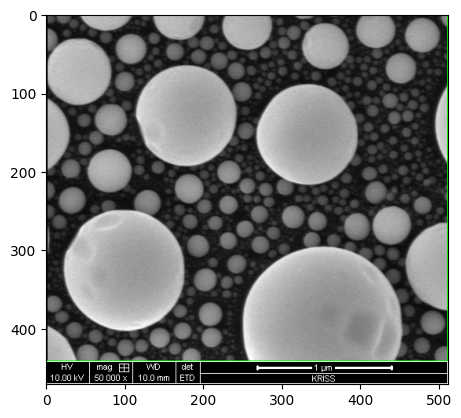

In [47]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img

img1 = img.imread(
    'C:/Users/In-Ho Lee/testAI/Line 50x_001.tif')
# img1=img1[0:target_height,0:target_width]
plt.imshow(img1, cmap=plt.cm.gray)

sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = "EDSR_x4.pb"
sr.readModel(path)
sr.setModel("edsr",4)
result = sr.upsample(img1)
# Resized image
resized = cv2.resize(img1,dsize=None,fx=4,fy=4)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img1[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()

In [48]:
import cv2
import time
import matplotlib.pyplot as plt

img1 = cv2.imread('input.png')
width = img1.shape[1]
height = img1.shape[0]
bicubic = cv2.resize(img1, (width*4, height*4))

super_res = cv2.dnn_superres.DnnSuperResImpl_create()
start = time.time()
super_res.readModel('EDSR_x4.pb')
super_res.setModel('edsr', 4)
edsr_image = super_res.upsample(img1)
end = time.time()
print('Time taken in seconds by edsr', end-start)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img1[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(edsr_image[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(bicubic[:,:,::-1])
plt.show()

AttributeError: module 'cv2' has no attribute 'dnn_superres'

이공학적 설계를 위한 인공지능 최적화
(Artificial Intelligence and Optimization Techniques for Engineering Design)

Chapter 7

In [ ]:
# bfgs algorithm local optimization of a convex function
from scipy.optimize import minimize
from numpy.random import rand
# objective function


def objective(x):
    return x[0]**2.0 + x[1]**2.0
# derivative of the objective function


def derivative(x):
    return [x[0] * 2, x[1] * 2]


# define range for input
r_min, r_max = -5.0, 5.0
# define the starting point as a random sample from the domain
pt = r_min + rand(2) * (r_max - r_min)
# perform the bfgs algorithm search
result = minimize(objective, pt, method='BFGS', jac=derivative)
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

In [ ]:
import numpy as np

def objective(x, y):
    return x**2.0 + y**2.0

def derivative(x, y):
    return np.asarray([x * 2.0, y * 2.0])

def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(x.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (np.sqrt(vhat) + eps)
        # evaluate candidate point
        score = objective(x[0], x[1])
        # report progress
        print('>%d f(%s) = %.5f' % (t, x, score))
    return [x, score]


# seed the pseudo random number generator
np.random.seed(17)
# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

In [ ]:
import os
import sys
import numpy as np
from scipy.optimize import minimize
import scipy.optimize as optimize
from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution

def append_multiple_lines(file_name, lines_to_append):
    with open(file_name, "a+") as file_object:
        appendEOL = False
        file_object.seek(0)
        data = file_object.read(100)
        if len(data) > 0:
            appendEOL = True
        for line in lines_to_append:
            if appendEOL == True:
                file_object.write("\n")
            else:
                appendEOL = True
            file_object.write(line)


def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1] + 47))))
            - x[0] * np.sin(np.sqrt(abs(x[0] - (x[1] + 47)))))


def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)


if False:
    optimize.show_options(solver='minimize', method='nelder-mead')
if False:
    x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
    ndim = len(x0)
    bnds = []
    for _ in range(ndim):
        bnds.append((-512., 512.))
if True:
    fname = 'input.txt'
    if not os.path.isfile(fname):
        print('input.txt is not present')
        sys.exit()
    afile = open(fname, 'r')
    jline = 0
    for line in afile:
        if jline == 0:
            ndim = int(line.split()[0])
            x0 = np.zeros(ndim)
        if jline > 0:
            if jline-1 < ndim:
                x0[jline-1] = float(line.split()[0])
                print(x0[jline-1])
        if jline == 1+ndim:
            ncal = int(line.split()[0])
        jline = jline+1
    afile.close()
    fname = 'bnds.txt'
    if not os.path.isfile(fname):
        print('bnds.txt is not present')
        sys.exit()
    afile = open(fname, 'r')
    jline = 0
    for line in afile:
        if jline == 0:
            bnds = []
        if jline > 0:
            if jline-1 < ndim:
                print((float(line.split()[0]), float(line.split()[1])))
                bnds.append((float(line.split()[0]), float(line.split()[1])))
        jline = jline+1
    afile.close()
    bnds = np.array(bnds)
if True:
    res = minimize(rosen, x0, method='nelder-mead', bounds=bnds,
                   options={'xatol': 1e-8, 'disp': True})
if False:
    res = dual_annealing(rosen, x0=x0, bounds=bnds)
if False:
    res = differential_evolution(rosen, bounds=bnds, maxiter=10)
print(res.x)
print(res.fun)

if False:
    lines_to_append = []
    lines_to_append.append(str(ndim))
    for i in range(ndim):
        lines_to_append.append(str(res.x[i]))
    lines_to_append.append(str(res.fun))
    lines_to_append.append(str(ncal))
    fname = 'output.txt'
    if os.path.isfile(fname):
        os.remove(fname)
    append_multiple_lines(fname, lines_to_append)

In [ ]:
#from scipy.optimize import minimize
from scipy.optimize import fmin
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

N = 100  # for testing
step = N//size  # say that N is divisible by size


def parallel_function_caller(x, stopp):
    stopp[0] = comm.bcast(stopp[0], root=0)
    summ = 0
    if stopp[0] == 0:
        # your function here in parallel
        x = comm.bcast(x, root=0)
        array = np.arange(x[0]-N/2.+rank*step-42, x[0] -
                        N/2.+(rank+1)*step-42, 1.)
        summl = np.sum(np.square(array))
        summ = comm.reduce(summl, op=MPI.SUM, root=0)
        if rank == 0:
            print( "value is "+str(summ))
    return summ


if rank == 0:
    stop = [0]
    x = np.zeros(1)
    x[0] = 20
    #xs = minimize(parallel_function_caller, x, args=(stop))
    xs = fmin(parallel_function_caller, x0=x, args=(stop,))
    print("the argmin is "+str(xs))
    stop = [1]
    parallel_function_caller(x, stop)

else:
    stop = [0]
    x = np.zeros(1)
    while stop[0] == 0:
        parallel_function_caller(x, stop)

In [ ]:
import os
import sys
import numpy as np
from scipy.optimize import minimize
import scipy.optimize as optimize
from scipy.optimize import dual_annealing


def append_multiple_lines(file_name, lines_to_append):
    with open(file_name, "a+") as file_object:
        appendEOL = False
        file_object.seek(0)
        data = file_object.read(100)
        if len(data) > 0:
            appendEOL = True
        for line in lines_to_append:
            if appendEOL == True:
                file_object.write("\n")
            else:
                appendEOL = True
            file_object.write(line)


def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1] + 47))))
            - x[0] * np.sin(np.sqrt(abs(x[0] - (x[1] + 47)))))


def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)


if False:
    optimize.show_options(solver='minimize', method='nelder-mead')
if True:
    x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
    ndim = len(x0)
    bnds = []
    for _ in range(ndim):
        bnds.append((-512., 512.))
if False:
    fname = 'input.txt'
    if not os.path.isfile(fname):
        print('input.txt is not present')
        sys.exit()
    afile = open(fname, 'r')
    jline = 0
    for line in afile:
        if jline == 0:
            ndim = int(line.split()[0])
            x0 = np.zeros(ndim)
        if jline > 0:
            if jline-1 < ndim:
                x0[jline-1] = float(line.split()[0])
                print(x0[jline-1])
        if jline == 1+ndim:
            ncal = int(line.split()[0])
        jline = jline+1
    afile.close()
    fname = 'bnds.txt'
    if not os.path.isfile(fname):
        print('bnds.txt is not present')
        sys.exit()
    afile = open(fname, 'r')
    jline = 0
    for line in afile:
        if jline == 0:
            bnds = []
        if jline > 0:
            if jline-1 < ndim:
                print((float(line.split()[0]), float(line.split()[1])))
                bnds.append((float(line.split()[0]), float(line.split()[1])))
        jline = jline+1
    afile.close()
    bnds = np.array(bnds)
if True:
    res = minimize(rosen, x0, method='nelder-mead', bounds=bnds,
                   options={'xatol': 1e-8, 'disp': True})
if False:
    res = dual_annealing(rosen, x0=x0, bounds=bnds)
print(res.x)
print(res.fun)

if False:
    lines_to_append = []
    lines_to_append.append(str(ndim))
    for i in range(ndim):
        lines_to_append.append(str(res.x[i]))
    lines_to_append.append(str(res.fun))
    lines_to_append.append(str(ncal))
    fname = 'output.txt'
    if os.path.isfile(fname):
        os.remove(fname)
    append_multiple_lines(fname, lines_to_append)

In [ ]:
import numpy as np
import math
from scipy.optimize import minimize, NonlinearConstraint, SR1

def f(x):
    return math.log(x[0]**2 + 1) + x[1]**4 + x[0]*x[2]

constr_func = lambda x: np.array( [ x[0]**3 - x[1]**2 - 1, x[0], x[2] ] )

x0=[0.,0.,0.]
nonlin_con = NonlinearConstraint( constr_func, 0., np.inf )
res = minimize( f, x0, method='trust-constr', jac='2-point', hess=SR1(), constraints = nonlin_con )
print( res)

In [ ]:
from scipy.optimize import minimize
a1, a2, a3 = 1167,1327,1907
b1,b2,b3 = 24000, 34400, 36000
c1,c2,c3 = 69500,15100,12700
x = [10000,10000,10000] 
res = minimize(
    lambda x: c1*x[0]+c2*x[1]+c3*x[2], #what we want to minimize
    x, 
    constraints = (
        {'type':'eq','fun': lambda x: x[0]*a1-x[1]*a2}, #1st subject
        {'type':'ineq','fun': lambda x: a1*x[0]+a2*x[1]+a3*x[2]-7}, #2st subject
        {'type':'ineq','fun': lambda x: b1*x[0]+b2*x[1]+b3*x[2]-0}, #3st subject
        {'type':'eq','fun': lambda x: x[0]%5+x[1]%5+x[2]%5-0}, # x1 x2 x3 are multiple of 5

                  ),
    bounds = ((0,None),(0,None),(0,None)),
    method='SLSQP',options={'disp': True,'maxiter' : 10000})

print(res)

In [ ]:
from scipy.optimize import minimize
import numpy as np
from scipy.optimize import linprog
# declare the decision variable bounds
x1_bounds = (0, None)
x2_bounds = (0, None)
# declare coefficients of the objective function
c = [-10, -5]
# declare the inequality constraint matrix
A = [[1,  1],
     [10, 0],
     [0,  5]]
# declare the inequality constraint vector
b = [24, 100, 100]
# solve
results = linprog(c=c, A_ub=A, b_ub=b, bounds=[
                  x1_bounds, x2_bounds], method='highs-ds')
# print results
if results.status == 0:
    print(f'The solution is optimal.')
print(f'Objective value: z* = {results.fun}')
print(f'Solution: x1* = {results.x[0]}, x2* = {results.x[1]}')


def objective(xvector):
    x = xvector[0]
    y = xvector[1]
    tmp = 5.*x+3.*y
    if x+2.*y > 14.:
        tmp = tmp+1.e8*(x+2.*y-14.)
    if 3.*x-y < 0.:
        tmp = tmp+1.e8*(3.*x-y)*(-1.)
    if x-y-2. > 0.:
        tmp = tmp+1.e8*(x-y-2.)
    return tmp


def objective1(xvector):
    x = xvector[0]
    y = xvector[1]
    tmp = -5.*x-3.*y
    if x+2.*y > 14.:
        tmp = tmp+1.e8*(x+2.*y-14.)
    if 3.*x-y < 0.:
        tmp = tmp+1.e8*(3.*x-y)*(-1.)
    if x-y-2. > 0.:
        tmp = tmp+1.e8*(x-y-2.)
    return tmp


best = 1e99
xbest = np.zeros((2))
for _ in range(30):
    bnds = [(-4., 8.) for i in range(2)]
    xvector = np.zeros((2))
    xvector[0] = -1.+(np.random.random()-0.5)*3.
    xvector[1] = -3.+(np.random.random()-0.5)*3.
    res = minimize(objective, xvector, method='Nelder-Mead', bounds=bnds,
                   options={'maxiter': 6000, 'maxfev': 9000, 'xtol': 1e-8, 'disp': False})
    xvector = res.x
    obj = res.fun
    print(obj)
    if best > obj:
        best = obj
        xbest = xvector
obj = best
xvector = xbest
print(xvector)
print(obj)

best = 1e99
xbest = np.zeros((2))
for _ in range(30):
    bnds = [(-4., 8.) for i in range(2)]
    xvector = np.zeros((2))
    xvector[0] = 6.+(np.random.random()-0.5)*3.
    xvector[1] = 4.+(np.random.random()-0.5)*3.
    res = minimize(objective1, xvector, method='Nelder-Mead', bounds=bnds,
                   options={'maxiter': 6000, 'maxfev': 9000, 'xtol': 1e-8, 'disp': False})
    xvector = res.x
    obj = res.fun
    print(obj)
    if best > obj:
        best = obj
        xbest = xvector
obj = best
xvector = xbest
print(xvector)
print(obj)

이공학적 설계를 위한 인공지능 최적화
(Artificial Intelligence and Optimization Techniques for Engineering Design)

Chapter 10

In [ ]:
import numpy as np


def functuser(x):
    case = 3

    if case == 1:
        total = 0.
        for j in range(len(x)):
            total += (x[j])**2
    if case == 2:
        #    Rastrigin
        total = 10.*len(x)
        for j in range(len(x)):
            total += x[j]**2-10.*np.cos(2.*np.pi*x[j])
    if case == 3:
        #   Rosenbrock
        xarray0 = np.zeros(len(x))
        for j in range(len(x)):
            xarray0[j] = x[j]
        total = sum(100.0*(xarray0[1:]-xarray0[:-1]
                    ** 2.0)**2.0 + (1-xarray0[:-1])**2.0)
    if case == 4:
        #   Styblinski-Tang
        total = 0.
        for j in range(len(x)):
            total += (x[j]**4-16.*x[j]**2+5.*x[j])/2.

    return total


class PARTICLE:
    def __init__(self, startx0, tmprt, xbounds, lverbose):
        self.position_i = []
        self.qosition_i = []
        self.position_best_i = []
        self.obj_best_i = 1e18
        self.obj_i = 1e18
        self.dimensions = len(startx0)
        self.tmprt = tmprt
        if lverbose:
            print(self.tmprt)
        for j in range(self.dimensions):
            self.position_i.append(
                startx0[j]+(np.random.random()-0.5)*2.*np.sqrt(self.tmprt)*0.101)
        if np.random.random() < 0.8:
            for j in range(self.dimensions):
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
        for j in range(self.dimensions):
            if self.position_i[j] > xbounds[j][1]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
            if self.position_i[j] < xbounds[j][0]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
        self.position_best_i = self.position_i.copy()
        self.qosition_i = self.position_i.copy()

    def evaluate(self, objfunct, xbounds):
        before = objfunct(self.position_i)
        for _ in range(200):
            for j in range(self.dimensions):
                self.qosition_i[j] = self.position_i[j] + \
                    (np.random.random()-0.5)*2.*np.sqrt(self.tmprt)*0.101
                if self.qosition_i[j] > xbounds[j][1]:
                    self.qosition_i[j] = xbounds[j][0] + \
                        (xbounds[j][1]-xbounds[j][0])*np.random.random()
                if self.qosition_i[j] < xbounds[j][0]:
                    self.qosition_i[j] = xbounds[j][0] + \
                        (xbounds[j][1]-xbounds[j][0])*np.random.random()
            after = objfunct(self.qosition_i)
            tmp = -(after-before)/self.tmprt
            if tmp > 300.:
                tmp = 300.
            if tmp < -300.:
                tmp = -300.
            if min(1., np.exp(tmp)) > np.random.random():
                before = after
                self.obj_i = after
                self.position_i = self.qosition_i.copy()
            if self.obj_i < self.obj_best_i:
                self.position_best_i = self.position_i.copy()
                self.obj_best_i = self.obj_i
        for _ in range(200):
            for j in range(self.dimensions):
                self.qosition_i[j] = self.position_i[j] + \
                    (np.random.random()-0.5)*2.*np.sqrt(self.tmprt)*0.101
                if self.qosition_i[j] > xbounds[j][1]:
                    self.qosition_i[j] = xbounds[j][0] + \
                        (xbounds[j][1]-xbounds[j][0])*np.random.random()
                if self.qosition_i[j] < xbounds[j][0]:
                    self.qosition_i[j] = xbounds[j][0] + \
                        (xbounds[j][1]-xbounds[j][0])*np.random.random()
            after = objfunct(self.qosition_i)
            tmp = -(after-before)/self.tmprt
            if tmp > 300.:
                tmp = 300.
            if tmp < -300.:
                tmp = -300.
            if min(1., np.exp(tmp)) > np.random.random():
                before = after
                self.obj_i = after
                self.position_i = self.qosition_i.copy()
            if self.obj_i < self.obj_best_i:
                self.position_best_i = self.position_i.copy()
                self.obj_best_i = self.obj_i


class REMC():
    def __init__(self, objfunct, startx0, xbounds, nparticles, maxiter, verbose=False):
        obj_best_g = 1e18
        position_best_g = []
        swarm = []
        tpset = []
        x1vec = []
        x2vec = []
        for i in range(nparticles):
            tmprt = 0.01+1.0*float(i)/float(nparticles-1)
            tpset.append(tmprt)
            swarm.append(PARTICLE(startx0, tmprt, xbounds, verbose))
        it = 0
        while it < maxiter:
            if verbose:
                print(f'iter: {it:>6d} best solution: {obj_best_g:16.8e}')
            for i in range(nparticles):
                swarm[i].evaluate(objfunct, xbounds)
                if swarm[i].obj_i < obj_best_g:
                    position_best_g = list(swarm[i].position_best_i)
                    obj_best_g = float(swarm[i].obj_best_i)
            lxcd = False
            for i in range(nparticles-1, 0, -1):
                if lxcd == True:
                    lxcd = False
                    continue
                if lxcd == False:
                    x1vec = list(swarm[i].position_i)
                    x2vec = list(swarm[i-1].position_i)
                    tmp = (1./tpset[i]-1./tpset[i-1]) * \
                        (swarm[i].obj_i-swarm[i-1].obj_i)
                    if tmp > 300.:
                        tmp = 300.
                    if tmp < -300.:
                        tmp = -300.
                    if min(1., np.exp(tmp)) > np.random.random():
                        lxcd = True
                        swarm[i].position_i = x2vec.copy()
                        swarm[i-1].position_i = x1vec.copy()
                        print('exchanged', i, i-1)
            it += 1
        print('\nfinal solution:')
        print(f'   > {position_best_g}')
        print(f'   > {obj_best_g}\n')
        if True:
            abc = np.zeros(nparticles)
            abcvec = np.zeros((nparticles, len(startx0)))
            for i in range(nparticles):
                abc[i] = swarm[i].obj_best_i
                abcvec[i] = swarm[i].position_best_i
            idx = abc.argsort()
            abc = abc[idx]
            abcvec = abcvec[idx, :]
            for i in range(nparticles):
                print(abc[i])
                print(abcvec[i, :])


startx0 = []
xbounds = []
for j in range(10):
    startx0.append(-20.+np.random.random()*(20.-(-20.)))
for j in range(len(startx0)):
    xbounds.append((-20., 20.))
REMC(functuser, startx0, xbounds, nparticles=50, maxiter=2000, verbose=True)

이공학적 설계를 위한 인공지능 최적화
(Artificial Intelligence and Optimization Techniques for Engineering Design)

Chapter 11

In [ ]:
import numpy as np
from scipy.optimize import minimize


def functuser(x):
    case = 3

    if case == 1:
        total = 0.
        for j in range(len(x)):
            total += (x[j])**2
    if case == 2:
        #    Rastrigin
        total = 10.*len(x)
        for j in range(len(x)):
            total += x[j]**2-10.*np.cos(2.*np.pi*x[j])
    if case == 3:
        #   Rosenbrock
        xarray0 = np.zeros(len(x))
        for j in range(len(x)):
            xarray0[j] = x[j]
        total = sum(100.0*(xarray0[1:]-xarray0[:-1]
                    ** 2.0)**2.0 + (1-xarray0[:-1])**2.0)
    if case == 4:
        #   Styblinski-Tang
        total = 0.
        for j in range(len(x)):
            total += (x[j]**4-16.*x[j]**2+5.*x[j])/2.
    return total


class PARTICLE:
    def __init__(self, startx0, ww, c1, c2, xbounds, lverbose):
        self.position_i = []
        self.velocity_i = []
        self.position_best_i = []
        self.obj_best_i = 9e99
        self.obj_i = 9e99
        self.dimensions = len(startx0)
        self.ww = ww+(np.random.random()-0.5)*0.2
        self.c1 = c1+(np.random.random()-0.5)*0.2
        self.c2 = c2+(np.random.random()-0.5)*0.2
        if lverbose:
            print(self.ww, self.c1, self.c2)
        for j in range(self.dimensions):
            self.velocity_i.append(np.random.uniform(-1, 1))
            self.position_i.append(startx0[j]*(1.+(np.random.random()-0.5)*2.))
        if np.random.random() < 0.8:
            for j in range(self.dimensions):
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
        for j in range(self.dimensions):
            if self.position_i[j] > xbounds[j][1]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
            if self.position_i[j] < xbounds[j][0]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
        self.position_best_i = self.position_i.copy()

    def evaluate(self, objfunct):
        #       self.obj_i=objfunct(self.position_i)
        xarray0 = np.zeros(self.dimensions)
        for j in range(self.dimensions):
            xarray0[j] = self.position_i[j]
        res = minimize(objfunct, xarray0, method='nelder-mead',
                       options={'xatol': 1e-6, 'disp': True, 'maxiter': 100000, 'maxfev': 40000 } )
        self.position_i = res.x.copy()
        self.obj_i = res.fun
        if self.obj_i < self.obj_best_i:
            self.position_best_i = self.position_i.copy()
            self.obj_best_i = self.obj_i

    def update_velocity(self, position_best_g):
        for j in range(self.dimensions):
            vc = self.c1 * \
                (self.position_best_i[j]-self.position_i[j])*np.random.random()
            vs = self.c2*(position_best_g[j] -
                          self.position_i[j])*np.random.random()
            self.velocity_i[j] = self.ww*self.velocity_i[j]+vc+vs

    def update_position(self, xbounds):
        for j in range(self.dimensions):
            self.position_i[j] = self.position_i[j]+self.velocity_i[j]
            if self.position_i[j] > xbounds[j][1]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
            if self.position_i[j] < xbounds[j][0]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()


class PSO():
    def __init__(self, objfunct, startx0, xbounds, ww=0.5, c1=1.0, c2=2.0, nparticles=50, maxiter=50000, verbose=False):
        obj_best_g = 9e99
        position_best_g = []
        swarm = []
        for _ in range(nparticles):
            swarm.append(PARTICLE(startx0, ww, c1, c2, xbounds, verbose))
        it = 0
        while it < maxiter:
            if verbose:
                print(f'iter: {it:>6d} best solution: {obj_best_g:16.8e}')
            for i in range(nparticles):
                swarm[i].evaluate(objfunct)
                if swarm[i].obj_i < obj_best_g:
                    position_best_g = list(swarm[i].position_i)
                    obj_best_g = float(swarm[i].obj_i)
            for i in range(nparticles):
                swarm[i].update_velocity(position_best_g)
                swarm[i].update_position(xbounds)
            it += 1
        print('\nfinal solution:')
        print(f'   > {position_best_g}')
        print(f'   > {obj_best_g}\n')
        if True:
            abc = np.zeros(nparticles)
            abcvec = np.zeros((nparticles, len(startx0)))
            for i in range(nparticles):
                abc[i] = swarm[i].obj_best_i
                abcvec[i] = swarm[i].position_best_i
            idx = abc.argsort()
            abc = abc[idx]
            abcvec = abcvec[idx, :]
            for i in range(nparticles):
                print(abc[i])
                print(abcvec[i, :])


startx0 = []
xbounds = []
for j in range(10):
    startx0.append(-20.+np.random.random()*(20.-(-20.)))
for j in range(len(startx0)):
    xbounds.append((-20., 20.))
PSO(functuser, startx0, xbounds, ww=0.5, c1=1.0,
    c2=2.0, nparticles=50, maxiter=10, verbose=True)

이공학적 설계를 위한 인공지능 최적화
(Artificial Intelligence and Optimization Techniques for Engineering Design)

Chapter 12

In [ ]:
import numpy as np
from scipy.optimize import minimize


def functuser(x):
    case = 3

    if case == 1:
        total = 0.
        for j in range(len(x)):
            total += (x[j])**2
    if case == 2:
        #    Rastrigin
        total = 10.*len(x)
        for j in range(len(x)):
            total += x[j]**2-10.*np.cos(2.*np.pi*x[j])
    if case == 3:
        #   Rosenbrock
        xarray0 = np.zeros(len(x))
        for j in range(len(x)):
            xarray0[j] = x[j]
        total = sum(100.0*(xarray0[1:]-xarray0[:-1]
                    ** 2.0)**2.0 + (1-xarray0[:-1])**2.0)
    if case == 4:
        #   Styblinski-Tang
        total = 0.
        for j in range(len(x)):
            total += (x[j]**4-16.*x[j]**2+5.*x[j])/2.
    return total


class PARTICLE:
    def __init__(self, startx0, ptbmp, pmut, pcross, xbounds, lverbose):
        self.position_i = []
        self.position_best_i = []
        self.obj_best_i = 9e99
        self.obj_i = 9e99
        self.dimensions = len(startx0)
        self.ptbmp = ptbmp+(np.random.random()-0.5)*0.2
        self.pmut = pmut+(np.random.random()-0.5)*0.1
        self.pcross = pcross+(np.random.random()-0.5)*0.1
        if self.pmut > 0.999 or self.pmut < 0.001:
            self.pmut = np.random.random()
        if self.pcross > 0.999 or self.pcross < 0.001:
            self.pcross = np.ramdom.random()
        if lverbose:
            print(self.ptbmp, self.pmut, self.pcross)
        for j in range(self.dimensions):
            self.position_i.append(startx0[j]*(1.+(np.random.random()-0.5)*2.))
        if np.random.random() < 0.8:
            for j in range(self.dimensions):
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
        for j in range(self.dimensions):
            if self.position_i[j] > xbounds[j][1]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
            if self.position_i[j] < xbounds[j][0]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
        self.position_best_i = self.position_i.copy()

    def evaluate(self, objfunct):
        #       self.obj_i=objfunct(self.position_i)
        xarray0 = np.zeros(self.dimensions)
        for j in range(self.dimensions):
            xarray0[j] = self.position_i[j]
        res = minimize(objfunct, xarray0, method='nelder-mead',
                       options={'xatol': 1e-6, 'disp': True, 'maxiter': 100000, 'maxfev': 40000})
        self.position_i = res.x.copy()
        self.obj_i = res.fun
        if self.obj_i < self.obj_best_i:
            self.position_best_i = self.position_i.copy()
            self.obj_best_i = self.obj_i

    def update_mutationcrossover(self, x1vec, x2vec):
        if np.random.random() < 0.5:
            for j in range(self.dimensions):
                self.position_i[j] = x1vec[j]
                if np.random.random() < self.pmut:
                    self.position_i[j] = x1vec[j] * \
                        (1.+(np.random.random()-0.5)*self.ptbmp)
        else:
            for j in range(self.dimensions):
                self.position_i[j] = x1vec[j]
                if np.random.random() < self.pcross:
                    self.position_i[j] = x2vec[j]

    def update_position(self, xbounds):
        for j in range(self.dimensions):
            if self.position_i[j] > xbounds[j][1]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
            if self.position_i[j] < xbounds[j][0]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()


class GA():
    def __init__(self, objfunct, startx0, xbounds, ptbmp=0.1, pmut=0.5, pcross=0.5, nparticles=50, maxiter=50000, verbose=False):
        obj_best_g = 9e99
        position_best_g = []
        swarm = []
        x1vec = []
        x2vec = []
        nsubpop = 0
        for _ in range(nparticles):
            swarm.append(PARTICLE(startx0, ptbmp, pmut,
                         pcross, xbounds, verbose))
        it = 0
        while it < maxiter:
            if verbose:
                print(f'iter: {it:>6d} best solution: {obj_best_g:16.8e}')
                if True and nparticles > 4:
                    print('lowest five')
                    abc = np.zeros(nparticles)
                    abcvec = np.zeros((nparticles, len(startx0)))
                    for i in range(nparticles):
                        abc[i] = swarm[i].obj_best_i
                        abcvec[i] = swarm[i].position_best_i
                    idx = abc.argsort()
                    abc = abc[idx]
                    abcvec = abcvec[idx, :]
                    print(abc[0], abc[1], abc[2], abc[3], abc[4])
                    print(abcvec[0, :])
                    print(abcvec[1, :])
                    print(abcvec[2, :])
                    print(abcvec[3, :])
                    print(abcvec[4, :])
            for i in range(nparticles):
                swarm[i].evaluate(objfunct)
                if swarm[i].obj_i < obj_best_g:
                    position_best_g = list(swarm[i].position_i)
                    obj_best_g = float(swarm[i].obj_i)
            for i in range(nparticles):
                i1 = int(np.random.random()*nparticles)
                i2 = int(np.random.random()*nparticles)
                k1 = i2
                if swarm[i1].obj_best_i < swarm[i2].obj_best_i:
                    k1 = i1
                for _ in range(nsubpop-1):
                    i1 = int(np.random.random()*nparticles)
                    if swarm[i1].obj_best_i < swarm[k1].obj_best_i:
                        k1 = i1
                i1 = int(np.random.random()*nparticles)
                i2 = int(np.random.random()*nparticles)
                k2 = i2
                if swarm[i1].obj_best_i < swarm[i2].obj_best_i:
                    k2 = i1
                for _ in range(nsubpop-1):
                    i1 = int(np.random.random()*nparticles)
                    if swarm[i1].obj_best_i < swarm[k2].obj_best_i:
                        k2 = i1
                x1vec = list(swarm[k1].position_best_i)
                x2vec = list(swarm[k2].position_best_i)
                swarm[i].update_mutationcrossover(x1vec, x2vec)
                swarm[i].update_position(xbounds)
            it += 1
        print('\nfinal solution:')
        print(f'   > {position_best_g}')
        print(f'   > {obj_best_g}\n')
        if True:
            abc = np.zeros(nparticles)
            abcvec = np.zeros((nparticles, len(startx0)))
            for i in range(nparticles):
                abc[i] = swarm[i].obj_best_i
                abcvec[i] = swarm[i].position_best_i
            idx = abc.argsort()
            abc = abc[idx]
            abcvec = abcvec[idx, :]
            for i in range(nparticles):
                print(abc[i])
                print(abcvec[i, :])


startx0 = []
xbounds = []
for j in range(10):
    startx0.append(-20.+np.random.random()*(20.-(-20.)))
for j in range(len(startx0)):
    xbounds.append((-20., 20.))
GA(functuser, startx0, xbounds, ptbmp=0.1, pmut=0.5,
   pcross=0.5, nparticles=50, maxiter=10, verbose=True)

이공학적 설계를 위한 인공지능 최적화
(Artificial Intelligence and Optimization Techniques for Engineering Design)

Chapter 13

In [ ]:
from scipy.optimize import minimize
import numpy as np


def functuser(x):
    case = 3

    if case == 1:
        total = 0.
        for j in range(len(x)):
            total += (x[j])**2
    if case == 2:
        #    Rastrigin
        total = 10.*len(x)
        for j in range(len(x)):
            total += x[j]**2-10.*np.cos(2.*np.pi*x[j])
    if case == 3:
        #   Rosenbrock
        xarray0 = np.zeros(len(x))
        for j in range(len(x)):
            xarray0[j] = x[j]
        total = sum(100.0*(xarray0[1:]-xarray0[:-1]
                    ** 2.0)**2.0 + (1-xarray0[:-1])**2.0)
    if case == 4:
        #   Styblinski-Tang
        total = 0.
        for j in range(len(x)):
            total += (x[j]**4-16.*x[j]**2+5.*x[j])/2.
    return total


class PARTICLE:
    def __init__(self, startx0, ptbmp, pccrr, ff, xbounds, lverbose):
        self.position_i = []
        self.position_best_i = []
        self.obj_best_i = 9e99
        self.obj_i = 9e99
        self.dimensions = len(startx0)
        self.ptbmp = ptbmp+(np.random.random()-0.5)*0.2
        self.pccrr = pccrr+(np.random.random()-0.5)*0.2
        self.ff = ff+(np.random.random()-0.5)*0.2
        if self.pccrr > 0.999 or self.pccrr < 0.001:
            self.pccrr = np.random.random()
        if self.ff > 1.999 or self.ff < 0.001:
            self.ff = np.random.random()*2.
        if lverbose:
            print(self.ptbmp, self.pccrr, self.ff)
        for j in range(self.dimensions):
            self.position_i.append(
                startx0[j]*(1.+(np.random.random()-0.5)*2.*ptbmp))
        if np.random.random() < 0.8:
            for j in range(self.dimensions):
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
        for j in range(self.dimensions):
            if self.position_i[j] > xbounds[j][1]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
            if self.position_i[j] < xbounds[j][0]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
        self.position_best_i = self.position_i.copy()

    def evaluate(self, objfunct):
        #       self.obj_i=objfunct(self.position_i)
        xarray0 = np.zeros(self.dimensions)
        for j in range(self.dimensions):
            xarray0[j] = self.position_i[j]
        res = minimize(objfunct, xarray0, method='nelder-mead',
                       options={'xatol': 1e-6, 'disp': True, 'maxiter': 100000, 'maxfev': 40000})
        self.position_i = res.x.copy()
        self.obj_i = res.fun
        if self.obj_i < self.obj_best_i:
            self.position_best_i = self.position_i.copy()
            self.obj_best_i = self.obj_i

    def update_mutationcrossover(self, x1vec, x2vec, x3vec, ff):
        ir = int(np.random.random()*self.dimensions)
        for j in range(self.dimensions):
            if np.random.random() < self.pccrr or j == ir:
                self.position_i[j] = x1vec[j]+ff*(x2vec[j]-x3vec[j])
            else:
                self.position_i[j] = self.position_best_i[j]

    def update_position(self, xbounds):
        for j in range(self.dimensions):
            if self.position_i[j] > xbounds[j][1]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()
            if self.position_i[j] < xbounds[j][0]:
                self.position_i[j] = xbounds[j][0] + \
                    (xbounds[j][1]-xbounds[j][0])*np.random.random()


class DE():
    def __init__(self, objfunct, startx0, xbounds, ptbmp=1.1, pccrr=0.5, ff=1.0, nparticles=50, maxiter=50000, verbose=False):
        obj_best_g = 9e99
        position_best_g = []
        swarm = []
        x1vec = []
        x2vec = []
        x3vec = []
        for _ in range(nparticles):
            swarm.append(PARTICLE(startx0, ptbmp, pccrr, ff, xbounds, verbose))
        it = 0
        while it < maxiter:
            if verbose:
                print(f'iter: {it:>6d} best solution: {obj_best_g:16.8e}')
            for i in range(nparticles):
                swarm[i].evaluate(objfunct)
                if swarm[i].obj_i < obj_best_g:
                    position_best_g = list(swarm[i].position_i)
                    obj_best_g = float(swarm[i].obj_i)
            for i in range(nparticles):
                while True:
                    i1 = int(np.random.random()*nparticles)
                    i2 = int(np.random.random()*nparticles)
                    i3 = int(np.random.random()*nparticles)
                    if i1 == i:
                        continue
                    if i2 == i:
                        continue
                    if i3 == i:
                        continue
                    if i1 != i2 and i2 != i3 and i3 != i1:
                        break
                x1vec = list(swarm[i1].position_best_i)
                x2vec = list(swarm[i2].position_best_i)
                x3vec = list(swarm[i3].position_best_i)
                swarm[i].update_mutationcrossover(x1vec, x2vec, x3vec, ff)
                swarm[i].update_position(xbounds)
            it += 1
        print('\nfinal solution:')
        print(f'   > {position_best_g}')
        print(f'   > {obj_best_g}\n')
        if True:
            abc = np.zeros(nparticles)
            abcvec = np.zeros((nparticles, len(startx0)))
            for i in range(nparticles):
                abc[i] = swarm[i].obj_best_i
                abcvec[i] = swarm[i].position_best_i
            idx = abc.argsort()
            abc = abc[idx]
            abcvec = abcvec[idx, :]
            for i in range(nparticles):
                print(abc[i])
                print(abcvec[i, :])


startx0 = []
xbounds = []
for j in range(10):
    startx0.append(-20.+np.random.random()*(20.-(-20.)))
for j in range(len(startx0)):
    xbounds.append((-20., 20.))
DE(functuser, startx0, xbounds, ptbmp=1.1, pccrr=0.5,
   ff=1.0, nparticles=50, maxiter=10, verbose=True)

이공학적 설계를 위한 인공지능 최적화
(Artificial Intelligence and Optimization Techniques for Engineering Design)

Chapter 16

In [ ]:
def gen_directories(npop, apath):
    for i in range(npop):
        astring = 'mkdir '+apath+'/'+str(i).zfill(4)
        os.system(astring)
    for i in range(npop):
        astring = 'cp '+apath+'/CSA_SOLDIER.pbs'+' '+apath+'/'+str(i).zfill(4)
        os.system(astring)

def del_directories(npop, apath):
    for i in range(npop):
        astring = 'rm '+apath+'/'+str(i).zfill(4)
        os.system(astring)

def write_trial_solution(ndim0, xvector, apath, iidd, ncal, iobj):
    fname = apath+'/'+str(iidd).zfill(4)+'/input.txt'
#   print(fname)
    gname = apath+'/'+str(iidd).zfill(4)+'/STATUS'
    hname = apath+'/'+str(iidd).zfill(4)+'/output.txt'
    iname = apath+'/'+str(iidd).zfill(4)+'/OUTPUT'
    jname = apath+'/'+str(iidd).zfill(4)+'/STOP'
    if os.path.isfile(fname):
        os.remove(fname)
    isign = 1
    if ndim0 < 0:
        isign = -1
    ndim = -ndim0
    if isign == -1:
        gen_trial_solution(fname, ndim, ncal, iobj)
#       print(fname,'r input.txt and qsub')
    if isign == 1:
        ndim = ndim0
        n3 = int(ndim/3)
        lines_to_append = []
        list1 = [int(xvector[i]) for i in range(n3)]
        astring = ' '
        for i in range(n3):
            astring = astring+str(list1[i])+' '
        lines_to_append.append(astring)
        list1 = [int(xvector[n3+i]) for i in range(n3)]
        astring = ' '
        for i in range(n3):
            astring = astring+str(list1[i])+' '
        lines_to_append.append(astring)
        list1 = [int(xvector[2*n3+i]) for i in range(n3)]
        astring = ' '
        for i in range(n3):
            astring = astring+str(list1[i])+' '
        lines_to_append.append(astring)
        lines_to_append.append(str(ncal)+' '+str(iobj)+' '+'\n')
        append_multiple_lines(fname, lines_to_append)
#       print(fname,'c or m input.txt and qsub')
    if False:
        astring = 'cd '+apath+'/'+str(iidd).zfill(4)+' ; qsub CSA_SOLDIER.pbs'
    else:
        astring = 'cd '+apath+'/' + \
                 str(iidd).zfill(4)+' ; sbatch CSA_SOLDIER.pbs'
    os.system(astring)
    astring = 'echo "ING" >> '+gname
    os.system(astring)